In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


<function parsing_evaluation_consistency.parse_normalize_trivia_multi(df: pandas.core.frame.DataFrame, group_col: str = 'question_id') -> pandas.core.frame.DataFrame>

# Parse model outputs
## SQuAD

In [228]:
# Importing parsing functions for TriviaQA
import importlib, parsing_evaluation_consistency as pec
importlib.reload(pec)
pec.parse_normalize_trivia_multi

from parsing_evaluation_consistency import (
    universal_answer_parser,
    normalize_text_answer,
    parse_squad_output,
    normalize_squad_multi,
    parse_squad_multi
)



In [229]:
df_squad = pd.read_csv("output/llm_sample_consistency/LLama3.2_1B/squad_llama_k5_topk.csv")

nonsense_answers = [
    "extracted_answer", "<answer>", "True", "Yes", "No",
    "<short answer>", "A", "B", "C", "D"
]

df_squad = df_squad[ ~df_squad["parsed_answer"].isin(nonsense_answers)]

print(f"Loaded SQuAD multi-sample data:")
print(f"- Total samples: {len(df_squad)}")
print(f"- Unique questions: {df_squad['question_id'].nunique()}")
print(f"- Samples per question: {len(df_squad) / df_squad['question_id'].nunique():.1f}")

# Check for unanswerable questions
if 'is_impossible' in df_squad.columns:
    unanswerable_count = df_squad['is_impossible'].sum()
    print(f"- Unanswerable questions: {unanswerable_count} ({unanswerable_count/len(df_squad)*100:.1f}%)")

# Parsing and normalizing the SQuAD outputs
df_parsed_squad = parse_squad_multi(df_squad, group_col="question_id")
print(f"\n✅ Multi-Sample SQuAD Results (Modularized):")
print(f"   - Valid parsed samples: {df_parsed_squad['parsed_answer'].notna().sum()}")
print(f"   - Number of unique questions: {df_parsed_squad['question_id'].nunique()}")
df_parsed_squad.head(15)



Loaded SQuAD multi-sample data:
- Total samples: 2500
- Unique questions: 500
- Samples per question: 5.0
- Unanswerable questions: 950 (38.0%)

✅ Multi-Sample SQuAD Results (Modularized):
   - Valid parsed samples: 1647
   - Number of unique questions: 500


,id,title,question,context,answers,is_impossible,prompt,question_id,sample_id,model_output,parsed_answer
0,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,0,NaN,None
1,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,1,NaN,None
2,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,2,NaN,None
3,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,3,NaN,None
4,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,4,NaN,None
5,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,0,Answer: Wi-fi.,answer wi-fi
6,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,1,Wi-Fi\nAnswer: Wi-Fi is a wireless technology ...,wi-fi
7,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,2,Wi-fi (wireless Ethernet) and telephone lines ...,wi-fi wireless ethernet and telephone lines ar...
8,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,3,Answer: wireless Ethernet (wi-fi).,answer wireless ethernet wi-fi
9,56dfbd5e231d4119001abd5a,Internet_service_provider,what type of technology is used to connect to ...,"ISPs provide Internet access, employing a ran...",['wireless Ethernet (wi-fi)'],False,You are a QA assistant. Use the context to ans...,1,4,Answer: Wi-fi (wireless Ethernet).,answer wi-fi wireless ethernet


In [54]:
## TO DO PARSING FUNKTIONEN ANPASSEN

from parsing_and_evaluation import (
    parse_aggregate_evaluate_squad_multi,
    parse_and_evaluate_squad_multi, 
    aggregate_confidence_squad,
    evaluate_squad_aggregated,
    normalize_squad_multi
)

df_squad = pd.read_csv("output/llm_sample_consistency/LLama3.2_1B/squad_llama_k5_topk.csv")

nonsense_answers = [
    "extracted_answer", "<answer>", "True", "Yes", "No",
    "<short answer>", "A", "B", "C", "D"
]

df_squad = df_squad[ ~df_squad["parsed_answer"].isin(nonsense_answers)]

print(f"Loaded SQuAD multi-sample data:")
print(f"- Total samples: {len(df_squad)}")
print(f"- Unique questions: {df_squad['question_id'].nunique()}")
print(f"- Samples per question: {len(df_squad) / df_squad['question_id'].nunique():.1f}")

# Check for unanswerable questions
if 'is_impossible' in df_squad.columns:
    unanswerable_count = df_squad['is_impossible'].sum()
    print(f"- Unanswerable questions: {unanswerable_count} ({unanswerable_count/len(df_squad)*100:.1f}%)")

df_parsed_squad, df_agg_squad, eval_df_squad, acc_squad = parse_aggregate_evaluate_squad_multi(
    df_squad, 
    group_col="question_id",
    similarity_threshold=0.8,  # Threshold for clustering similar answers
    remove_unanswerable=False  # Set to True if you want to exclude unanswerable questions
)

print(f"\n✅ Multi-Sample SQuAD Results (Modularized):")
print(f"   - Valid parsed samples: {df_parsed_squad['parsed_answer'].notna().sum()}")
print(f"   - Number of unique questions: {df_parsed_squad['question_id'].nunique()}")


Loaded SQuAD multi-sample data:
- Total samples: 2500
- Unique questions: 500
- Samples per question: 5.0
- Unanswerable questions: 950 (38.0%)

✅ Multi-Sample SQuAD Results (Modularized):
   - Valid parsed samples: 2497
   - Number of unique questions: 500


## TriviaQA

In [209]:
# Importing parsing functions for TriviaQA
import importlib, parsing_evaluation_consistency as pec
importlib.reload(pec)
pec.parse_normalize_trivia_multi

from parsing_evaluation_consistency import (
    universal_answer_parser,
    normalize_text_answer,
    parse_trivia_output,
    normalize_trivia_multi,
    parse_trivia_multi
)

In [210]:
# Load dataset
df_trivia = pd.read_csv("output/llm_sample_consistency/LLama3.2_1B/trivia_llama_k5_topk.csv")

print(f"Loaded TriviaQA multi-sample data:")
print(f"- Total samples: {len(df_trivia)}")
print(f"- Unique questions: {df_trivia['question_id'].nunique()}")
print(f"- Samples per question: {len(df_trivia) / df_trivia['question_id'].nunique():.1f}")

# Parsing and normalizing the model outputs
df_parsed_trivia = parse_trivia_multi(df_trivia, group_col="question_id")

print(f"\n✅ Multi-Sample TriviaQA Results (Modularized):")
valid_parsed_trivia = df_parsed_trivia.dropna(subset=["parsed_answer"])
print(f"   - Valid parsed samples: {len(valid_parsed_trivia)}")
print(f"   - Number of unique questions: {df_parsed_trivia['question_id'].nunique()}")

df_parsed_trivia.head(15)

Loaded TriviaQA multi-sample data:
- Total samples: 2500
- Unique questions: 500
- Samples per question: 5.0

✅ Multi-Sample TriviaQA Results (Modularized):
   - Valid parsed samples: 2464
   - Number of unique questions: 500


,question,question_id,question_source,answers,prompt,sample_id,model_output,parsed_answer
0,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,0,(5 points)\n\nWhat is the result of dividing a...,c
1,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,1,"(A) Fraction, (B) Integer, (C) Decimal, (D) De...",i
2,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,2,(1) One\n(2) Zero\n(3) One-half\n(4) Square ro...,
3,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,3,&quot;\n\nA) Quotient\nB) Remainder\nC) Produc...,b
4,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,4,NaN,None
5,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,0,A) The Lamb & Flag\nB) The Eagle and Child\nC)...,a
6,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,1,A) The Eagle and Child\nB) The Spaniards Inn\n...,b
7,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,2,A) The Eagle\nB) The Lamb & Flag\nC) The Crane...,b
8,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,3,"In 1962, Ronnie Kray was sentenced to 30 years...",a
9,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,4,A) The Sherlock Holmes pub \nB) The Sherlock H...,i


In [198]:
## TO DO PARSING FUNKTIONEN ANPASSEN

from parsing_and_evaluation import (
    parse_aggregate_evaluate_trivia_multi,
    parse_and_evaluate_trivia_multi, 
    aggregate_confidence_trivia,
    evaluate_trivia_aggregated,
    normalize_trivia_multi
)

# Load dataset
df_trivia = pd.read_csv("output/llm_sample_consistency/LLama3.2_1B/trivia_llama_k5_topk.csv")

# Remove any rows with non-sense answers in parsed_answer column
nonsense_answers = [
    "A", "B", "C", "D", "E", "F",
    "True", "<string>", "extracted_answer"
]

df_trivia = df_trivia[~df_trivia["parsed_answer"].isin(nonsense_answers)]

print(f"Loaded TriviaQA multi-sample data:")
print(f"- Total samples: {len(df_trivia)}")
print(f"- Unique questions: {df_trivia['question_id'].nunique()}")
print(f"- Samples per question: {len(df_trivia) / df_trivia['question_id'].nunique():.1f}")

# Parsing and normalizing the model outputs
df_parsed_trivia, df_agg_trivia, eval_df_trivia, acc_trivia = parse_aggregate_evaluate_trivia_multi(
    df_trivia, 
    group_col="question_id",
    similarity_threshold=0.8  # Threshold for clustering similar answers
)

print(f"\n✅ Multi-Sample TriviaQA Results (Modularized):")
valid_parsed_trivia = df_parsed_trivia.dropna(subset=["parsed_answer"])
print(f"   - Valid parsed samples: {len(valid_parsed_trivia)}")
print(f"   - Number of unique questions: {df_parsed_trivia['question_id'].nunique()}")

# Display the first 15 rows of the parsed DataFrame
df_parsed_trivia.head(15)

Loaded TriviaQA multi-sample data:
- Total samples: 2500
- Unique questions: 500
- Samples per question: 5.0

✅ Multi-Sample TriviaQA Results (Modularized):
   - Valid parsed samples: 2463
   - Number of unique questions: 500


,question,question_id,question_source,answers,prompt,sample_id,model_output,parsed_answer,parsed_confidence
0,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,0,(5 points)\n\nWhat is the result of dividing a...,is c the quotient,NaN
1,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,1,"(A) Fraction, (B) Integer, (C) Decimal, (D) De...",is d},NaN
2,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,2,(1) One\n(2) Zero\n(3) One-half\n(4) Square ro...,is $\boxed{4}$,NaN
3,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,3,&quot;\n\nA) Quotient\nB) Remainder\nC) Produc...,is $\boxed{a}$,NaN
4,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,4,NaN,None,NaN
5,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,0,A) The Lamb & Flag\nB) The Eagle and Child\nC)...,a the lamb & flag,NaN
6,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,1,A) The Eagle and Child\nB) The Spaniards Inn\n...,b the spaniards inn,NaN
7,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,2,A) The Eagle\nB) The Lamb & Flag\nC) The Crane...,a the eagle,NaN
8,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,3,"In 1962, Ronnie Kray was sentenced to 30 years...",a the lamb & flag,NaN
9,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,4,A) The Sherlock Holmes pub \nB) The Sherlock H...,is e,NaN


# Helper functions for similarity measures

## SentenceBERT
- **mean_similarity**: mean value of all pairwise cosine similarities between the answer-embeddings
    - Values near 1 imply that the answers are very similar (high consistency)
- **std_similarity**: deviation of similarities -> how different the pairs are
    - high values imply that some pairs are very similar and other very unsimilar
    - analyse how equally consistent the pairs are
- **n_pairs**: how many pair comparisons were made for the calculation of similarity -> $n\_pairs = \binom{n}{2}$

In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Load model
model = SentenceTransformer("all-MiniLM-L6-v2")

def compute_sentenceBERT_similarity(df, question_id_col, answer_col, is_impossible_col=None):
    """
    Calculates similarity statistics for questions with multiple answers.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        question_id_col (str): The name of the column containing question IDs.
        answer_col (str): The name of the column containing answers.
        is_impossible_col (str, optional): The name of the column indicating if the question is impossible.
                                           If None, this column is ignored.

    Returns:
        pd.DataFrame: A DataFrame with the calculated similarity statistics.
    """
    similarity_stats = []

    # If is_impossible_col is provided, process separately for True and False
    if is_impossible_col:
        for is_impossible_value in [False, True]:
            df_filtered = df[df[is_impossible_col] == is_impossible_value]
            grouped = df_filtered.groupby(question_id_col)

            for qid, group in grouped:
                answers = group[answer_col].dropna().tolist()

                # Only compute similarity if there are at least 2 answers
                if len(answers) >= 2:
                    embeddings = model.encode(answers, convert_to_tensor=True)
                    sim_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()
                    i_upper = np.triu_indices(len(answers), k=1)
                    sim_scores = sim_matrix[i_upper]

                    similarity_stats.append({
                        "question_id": qid,
                        "is_impossible": is_impossible_value,
                        "num_answers": len(answers),
                        "mean_similarity": sim_scores.mean(),
                        "std_similarity": sim_scores.std(),
                        "n_pairs": len(sim_scores)
                    })

    else:
        # If is_impossible_col is not provided, process all questions together
        grouped = df.groupby(question_id_col)

        for qid, group in grouped:
            answers = group[answer_col].dropna().tolist()

            # Only compute similarity if there are at least 2 answers
            if len(answers) >= 2:
                embeddings = model.encode(answers, convert_to_tensor=True)
                sim_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()
                i_upper = np.triu_indices(len(answers), k=1)
                sim_scores = sim_matrix[i_upper]

                similarity_stats.append({
                    "question_id": qid,
                    "num_answers": len(answers),
                    "mean_similarity": sim_scores.mean(),
                    "std_similarity": sim_scores.std(),
                    "n_pairs": len(sim_scores)
                })

    return pd.DataFrame(similarity_stats)

## RoBERTa
- PROBLEM: Roberta is trained fpr masked language modeling at token level (-> prediciting missing words)
    - it does not produce sentence-level embeddings where semantic similarity is produced
    - space is not calibrated for similarity and therefore leads to noisy and unreliable results
- SOLUTION (also what they used in the polygraph package):
    - use an NLI (Natural Language Interface) model built on Roberta (here: roberta-large-mnli) and look at entailment probabilities
    - checks if one answers logically follows from another (here: from the question) and directly provides a confidence/uncertainty score 
    - score is between 0 and 1: higher -> answers are more logically consistent


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# ---- Load RoBERTa-MNLI verifier (like in Polygraph approaches) ----
_DEVICE = "cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu")
_NLI_MODEL_NAME = "roberta-large-mnli"  # Labels: [contradiction, neutral, entailment]
_nli_tok = AutoTokenizer.from_pretrained(_NLI_MODEL_NAME, use_fast=True)
_nli_model = AutoModelForSequenceClassification.from_pretrained(_NLI_MODEL_NAME).to(_DEVICE).eval()

@torch.inference_mode()
def _nli_entail_probs(premises, hypotheses, max_length=256, batch_size=64):
    """
    Batched NLI scoring.
    Returns:
      entailment probabilities, shape: (N,)
      entropies (natural log), shape: (N,) over the 3-way softmax
    """
    ent_all, H_all = [], []
    eps = 1e-12
    for i in range(0, len(premises), batch_size):
        enc = _nli_tok(
            premises[i:i+batch_size],
            hypotheses[i:i+batch_size],
            return_tensors="pt",
            truncation=True,
            padding=True,
            max_length=max_length
        ).to(_DEVICE)
        logits = _nli_model(**enc).logits  # (B,3) -> [contra, neutral, entailment]
        probs = torch.softmax(logits, dim=-1)
        ent = probs[:, 2]
        H = -(probs * (probs + eps).log()).sum(dim=-1)
        ent_all.append(ent.detach().cpu())
        H_all.append(H.detach().cpu())
    return torch.cat(ent_all).numpy(), torch.cat(H_all).numpy()


def compute_roberta_mnli_similarity(
    df: pd.DataFrame,
    question_id_col: str,
    answer_col: str,
    is_impossible_col: str | None = None,
    # mode control
    mode: str = "answer_answer",  # "answer_answer" or "answer_ground_truth"
    ground_truth_col: str | None = None,
    # optional context
    question_text_col: str | None = None,
    # scoring params
    bidirectional: bool = True,
    max_length: int = 256,
    batch_size: int = 64,
    include_uncertainty_cols: bool = True,
):
    """
    Flexible RoBERTa-MNLI-based similarity.

    Modes:
      - "answer_answer": pairwise entailment between answers in a question group.
                         Similarity = average P(entailment) over A_i->A_j (and A_j->A_i if bidirectional).
      - "answer_ground_truth": entailment between each answer and its ground truth.
                         If multiple GT per question, averages over all GT x answers pairs.
                         Similarity = average P(entailment) over GT->A (and A->GT if bidirectional).

    Returns (per question, and per is_impossible flag if provided):
      - num_answers
      - n_pairs
      - mean_similarity ([0,1])
      - std_similarity
      - (optional) mean_entropy, std_entropy, uncertainty = 1 - mean_similarity
    """
    assert mode in {"answer_answer", "answer_ground_truth"}, "mode must be 'answer_answer' or 'answer_ground_truth'"
    if mode == "answer_ground_truth":
        assert ground_truth_col is not None, "ground_truth_col is required for mode='answer_ground_truth'"

    rows = []

    def _premise_for_gt(gt: str, qtext: str | None):
        # Build a richer premise if question text is available
        if qtext:
            return f"Question: {qtext}\nGround truth: {gt}"
        return f"Ground truth: {gt}"

    def _process_group(g: pd.DataFrame, qid, extra_cols=None):
        answers = [a.strip() for a in g[answer_col].dropna().astype(str).tolist() if a and a.strip()]
        if len(answers) < 1:
            return  # nothing to score
        qtext = str(g[question_text_col].iloc[0]) if (question_text_col and question_text_col in g.columns) else None

        sim_scores = []
        entropies = []

        if mode == "answer_answer":
            # Need at least 2 answers for pairwise scoring
            if len(answers) < 2:
                return
            n = len(answers)
            iu = np.triu_indices(n, k=1)
            idx_i, idx_j = iu

            # forward A_i -> A_j
            premises_f = [f"A: {answers[i]}" for i in idx_i]
            hypos_f    = [f"The answer is: {answers[j]}." for j in idx_j]
            p_f, H_f   = _nli_entail_probs(premises_f, hypos_f, max_length=max_length, batch_size=batch_size)

            if bidirectional:
                # backward A_j -> A_i
                premises_b = [f"A: {answers[j]}" for j in idx_j]
                hypos_b    = [f"The answer is: {answers[i]}." for i in idx_i]
                p_b, H_b   = _nli_entail_probs(premises_b, hypos_b, max_length=max_length, batch_size=batch_size)
                p_pairs = (p_f + p_b) / 2.0
                H_pairs = (H_f + H_b) / 2.0
            else:
                p_pairs, H_pairs = p_f, H_f

            sim_scores.extend(p_pairs.tolist())
            entropies.extend(H_pairs.tolist())
            n_pairs = len(p_pairs)

        else:  # mode == "answer_ground_truth"
            gts = [gt.strip() for gt in g[ground_truth_col].dropna().astype(str).unique().tolist() if gt and gt.strip()]
            if len(gts) == 0:
                return

            # Build all GT x Answer pairs
            premises_f, hypos_f = [], []
            for gt in gts:
                prem = _premise_for_gt(gt, qtext)
                for a in answers:
                    premises_f.append(prem)
                    hypos_f.append(f"Predicted answer: {a}.")
            p_f, H_f = _nli_entail_probs(premises_f, hypos_f, max_length=max_length, batch_size=batch_size)

            if bidirectional:
                # Reverse direction: treat the answer as premise, GT as hypothesis
                premises_b, hypos_b = [], []
                for gt in gts:
                    for a in answers:
                        premises_b.append(f"Answer: {a}")
                        hypos_b.append(f"The ground truth is: {gt}.")
                p_b, H_b = _nli_entail_probs(premises_b, hypos_b, max_length=max_length, batch_size=batch_size)
                p_pairs = (p_f + p_b) / 2.0
                H_pairs = (H_f + H_b) / 2.0
            else:
                p_pairs, H_pairs = p_f, H_f

            sim_scores.extend(p_pairs.tolist())
            entropies.extend(H_pairs.tolist())
            n_pairs = len(p_pairs)

        if n_pairs == 0:
            return

        row = {
            "question_id": qid,
            "num_answers": int(len(answers)),
            "n_pairs": int(n_pairs),
            "mean_similarity": float(np.mean(sim_scores)),
            "std_similarity": float(np.std(sim_scores, ddof=0)),
        }
        if include_uncertainty_cols:
            row.update({
                "mean_entropy": float(np.mean(entropies)),
                "std_entropy": float(np.std(entropies, ddof=0)),
                "uncertainty": float(1.0 - np.mean(sim_scores)),  # lower is better
            })
        if extra_cols:
            row.update(extra_cols)
        rows.append(row)

    if is_impossible_col:
        for flag in [False, True]:
            sub = df[df[is_impossible_col] == flag]
            for qid, g in sub.groupby(question_id_col):
                _process_group(g, qid, extra_cols={"is_impossible": flag})
    else:
        for qid, g in df.groupby(question_id_col):
            _process_group(g, qid)

    # Build output
    base_cols = ["question_id", "num_answers", "n_pairs", "mean_similarity", "std_similarity"]
    extra_cols = (["is_impossible"] if is_impossible_col else [])
    u_cols = ["mean_entropy", "std_entropy", "uncertainty"] if include_uncertainty_cols else []
    cols = extra_cols + base_cols + u_cols

    out = pd.DataFrame(rows)
    if len(out) == 0:
        return pd.DataFrame(columns=cols)
    # Stable order
    return out[[c for c in cols if c in out.columns]].sort_values(["question_id"] + extra_cols)

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Analysis of SQuAD Dataset
## Consistency between model answers
### SentenceBERT

In [ ]:
# Compute SentenceBERT similarity for SQuAD dataset
similarity_df_squad = compute_sentenceBERT_similarity(
    df=df_parsed_squad,
    question_id_col="question_id",
    answer_col="parsed_answer",
    is_impossible_col="is_impossible"
)
similarity_df_squad["dataset"] = "SQuAD"

print(similarity_df_squad.shape)

num_unanswerable = similarity_df_squad[similarity_df_squad["is_impossible"] == True].shape[0]
print(f"Number of unanswerable questions in similarity_df_squad: {num_unanswerable}")

similarity_df_squad.head(15)

(500, 7)
Number of unanswerable questions in similarity_df_squad: 190


,question_id,is_impossible,num_answers,mean_similarity,std_similarity,n_pairs,dataset
0,0,False,5,1.000000,5.960464e-08,10,SQuAD
1,1,False,5,0.691313,1.123524e-01,10,SQuAD
2,2,False,5,0.389219,1.484323e-01,10,SQuAD
3,3,False,5,0.406576,4.236245e-01,10,SQuAD
4,4,False,5,0.384164,4.165010e-01,10,SQuAD
5,5,False,5,0.474839,3.582628e-01,10,SQuAD
6,6,False,5,0.377643,4.878722e-01,10,SQuAD
7,7,False,5,0.577356,5.176307e-01,10,SQuAD
8,8,False,5,0.396200,3.965014e-01,10,SQuAD
9,9,False,5,0.667697,4.069867e-01,10,SQuAD



Unanswerable Questions Count:
is_impossible
False    310
True     190
Name: count, dtype: int64


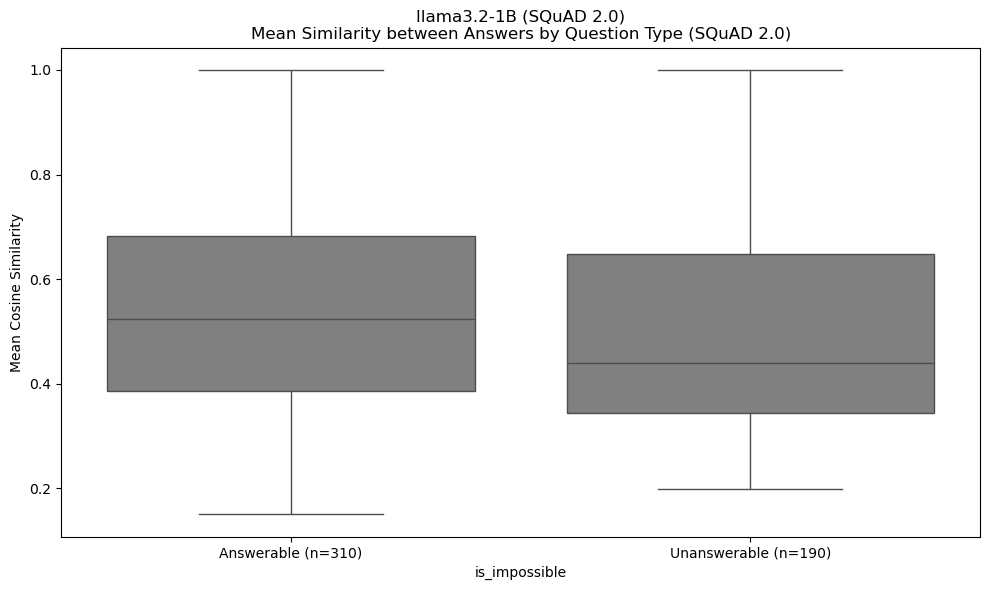

In [73]:
count_impossible = similarity_df_squad['is_impossible'].value_counts()
print(f"\nUnanswerable Questions Count:\n{count_impossible}")

# Compare mean similarity (consistency) between unanswerable and answerable questions
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="is_impossible",
    y="mean_similarity",
    data=similarity_df_squad,
    showfliers=True,
    color="grey"
)
plt.title("llama3.2-1B (SQuAD 2.0)\nMean Similarity between Answers by Question Type (SQuAD 2.0)")
plt.ylabel("Mean Cosine Similarity")
plt.xticks([0, 1], ["Answerable (n=310)", "Unanswerable (n=190)"])
plt.tight_layout()
plt.show()

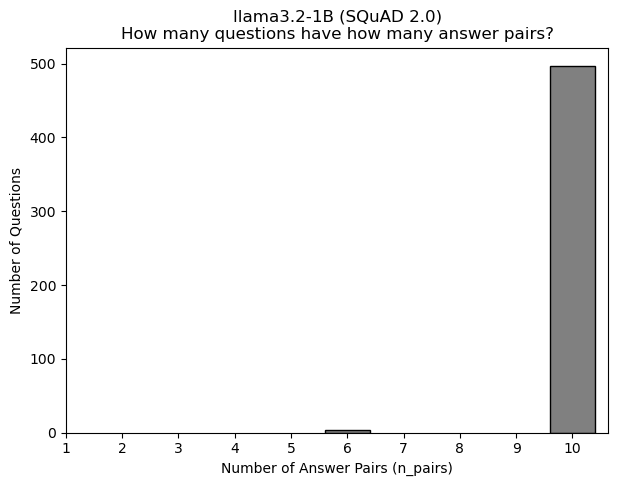

In [ ]:
# Count the number of answer pairs (n_pairs) for SQuAD dataset
pair_counts = similarity_df_squad["n_pairs"].value_counts().sort_index()
plt.figure(figsize=(7, 5))
plt.bar(pair_counts.index, pair_counts.values, width=0.8, edgecolor='black', color='grey')
plt.xlabel("Number of Answer Pairs (n_pairs)")
plt.ylabel("Number of Questions")
plt.title("llama3.2-1B (SQuAD 2.0)\nHow many questions have how many answer pairs?")
plt.xticks(range(1, 11))
#plt.savefig("figures/metrics/sampling_consistency/distribution_npairs_trivia_llama3.2.png")
plt.show()

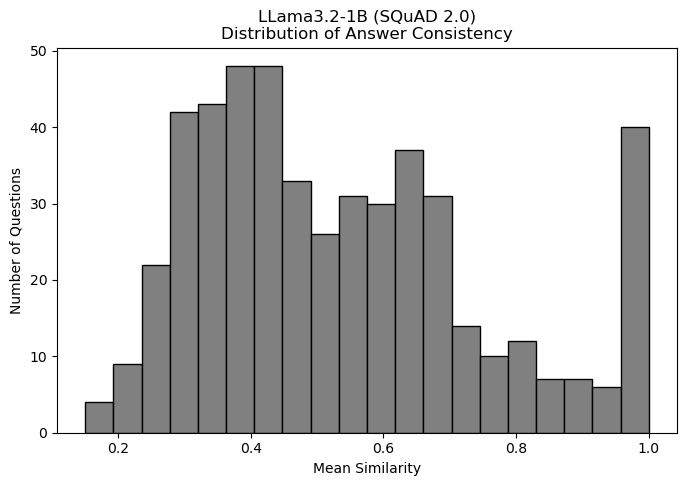

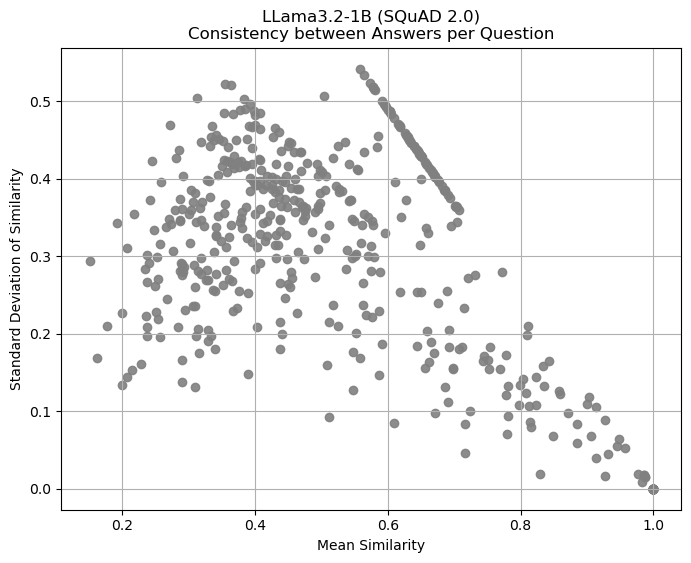

In [ ]:
# Plot distribution of mean similarity
plt.figure(figsize=(8, 5))
plt.hist(similarity_df_squad["mean_similarity"], bins=20, color="grey", edgecolor='black')
plt.xlabel("Mean Similarity")
plt.ylabel("Number of Questions")
plt.title("LLama3.2-1B (SQuAD 2.0)\nDistribution of Answer Consistency")
#plt.savefig("figures/metrics/sampling_consistency/consistency_distribution_squad_llama3.2.png")
plt.show()

# Plot consistency of answers per question
plt.figure(figsize=(8, 6))
plt.scatter(similarity_df_squad["mean_similarity"], similarity_df_squad["std_similarity"], alpha=0.9, color='grey')
plt.xlabel("Mean Similarity")
plt.ylabel("Standard Deviation of Similarity")
plt.title("LLama3.2-1B (SQuAD 2.0)\nConsistency between Answers per Question")
#plt.savefig("figures/metrics/sampling_consistency/consistency_std_mean_squad_llama3.2.png")
plt.grid(True)
plt.show()

FINDINGS
- peak at moderate mean similarity: questions still allow for varying interpretations
- distribution of mean similarity is farily broad
- strong negative correlation between std and mean similarity -> Higher mean similarity (higher consistency) implies lower variability among responses
- questions with very high mean similarity have almost no variability -> asnwers to these questions are nearly identical

### RoBERTa

- Natural NLI setup:
    - Premise: ground truth (or question + ground truth)
    - Hypothesis: model's generated answers
- Output: P(entailment) = How strongly does this answer logically follow from the ground truth?

In [238]:
similarity_df_squad_roberta = compute_roberta_mnli_similarity(
    df=df_parsed_squad,
    question_id_col="question_id",
    answer_col="parsed_answer",
    is_impossible_col="is_impossible",
    mode="answer_answer"
)
similarity_df_squad_roberta["dataset"] = "SQuAD"
similarity_df_squad_roberta.head(15)

,is_impossible,question_id,num_answers,n_pairs,mean_similarity,std_similarity,mean_entropy,std_entropy,uncertainty,dataset
0,False,1,5,10,0.575954,0.186334,0.256663,0.065119,0.424046,SQuAD
1,False,2,5,10,0.263932,0.214217,0.625102,0.224278,0.736068,SQuAD
2,False,3,2,1,0.018289,0.000000,0.145793,0.000000,0.981711,SQuAD
3,False,4,2,1,0.004262,0.000000,0.078911,0.000000,0.995738,SQuAD
4,False,5,2,1,0.018697,0.000000,0.162593,0.000000,0.981303,SQuAD
5,False,6,3,3,0.649501,0.217136,0.137057,0.039930,0.350499,SQuAD
6,False,8,2,1,0.008550,0.000000,0.100377,0.000000,0.991450,SQuAD
262,True,10,4,6,0.516573,0.451041,0.317675,0.164019,0.483427,SQuAD
7,False,11,5,10,0.424809,0.286396,0.466453,0.221256,0.575191,SQuAD
8,False,12,2,1,0.054975,0.000000,0.480846,0.000000,0.945025,SQuAD


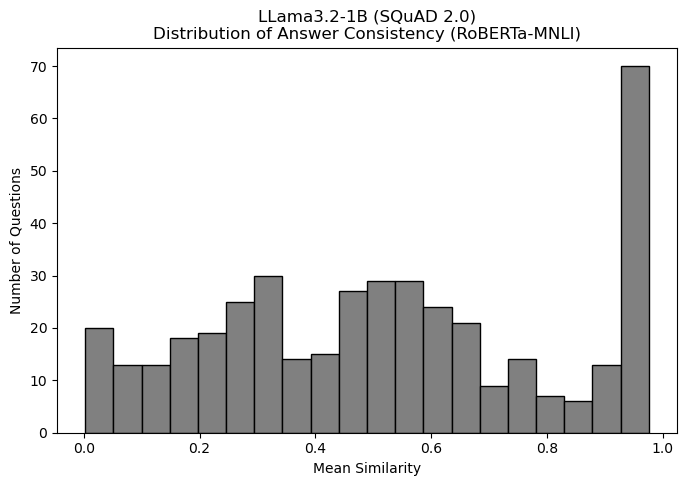


Unanswerable Questions Count (RoBERTa):
{False: 262, True: 154}


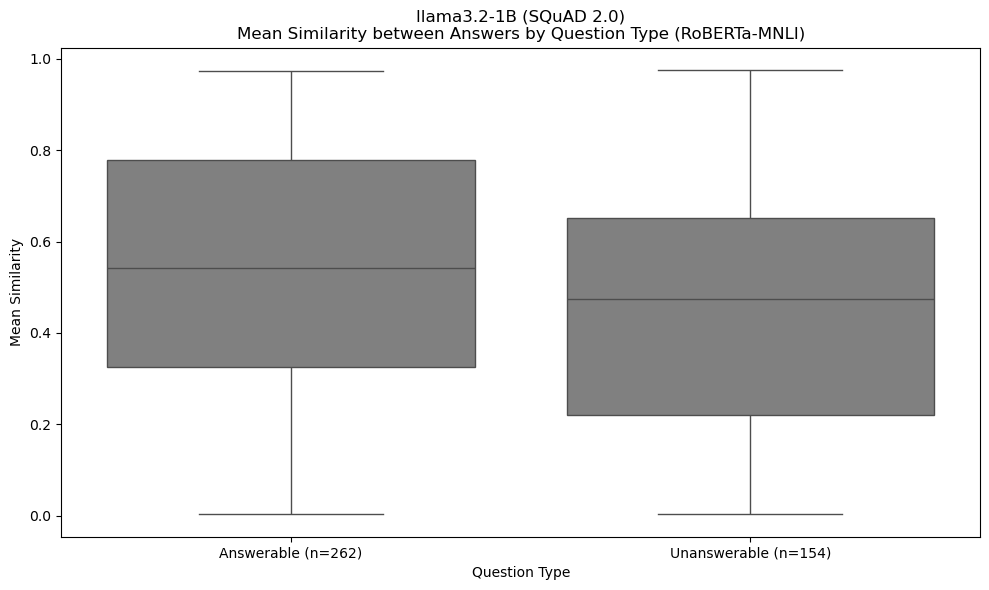

In [247]:
# Distribution of mean similarity
plt.figure(figsize=(8, 5))
plt.hist(similarity_df_squad_roberta["mean_similarity"], bins=20, color="grey", edgecolor='black')
plt.xlabel("Mean Similarity")
plt.ylabel("Number of Questions")
plt.title("LLama3.2-1B (SQuAD 2.0)\nDistribution of Answer Consistency (RoBERTa-MNLI)")
#plt.savefig("figures/metrics/sampling_consistency/consistency_distribution_squad_llama3.2_roberta.png")
plt.show()

# Boxplot by category is_impossible
counts_impossible = similarity_df_squad_roberta['is_impossible'].value_counts().to_dict()
print(f"\nUnanswerable Questions Count (RoBERTa):\n{counts_impossible}")

plt.figure(figsize=(10, 6))
sns.boxplot(
    x="is_impossible",
    y="mean_similarity",
    data=similarity_df_squad_roberta,
    showfliers=True,
    color="grey"
)
plt.title("llama3.2-1B (SQuAD 2.0)\nMean Similarity between Answers by Question Type (RoBERTa-MNLI)")
plt.ylabel("Mean Similarity")
plt.xlabel("Question Type")
plt.xticks([0, 1], ["Answerable (n=262)", "Unanswerable (n=154)"])
plt.tight_layout()
#plt.savefig("figures/metrics/sampling_consistency/consistency_boxplot_squad_llama3.2_roberta.png")
plt.show()

## Generate Correctness of answers
### SentenceBERT
Correctness is generated by computing the SentenceBERT similarity between the model answers and the ground truth answers.

- **mean_similarity:** how close are the model's answers on average to ground truth\
-> high mean similarity: model tends to produce answers that are semantically close to ground truth
- **std:** How stable or uncertain the model is with respect to the correct answer\
-> low std: model is consistent (all answers are similarily correct)

In [ ]:
# Load original SQuAD dataset to merge with parsed results
df_squad_original = pd.read_csv("data/SQuAD2_merged.csv")
df_squad_merged = df_parsed_squad.merge(df_squad_original[['id', 'answers']], on='id', how='left', suffixes=('', '_gt'))
df_squad_merged

,id,title,question,context,answers,is_impossible,prompt,question_id,sample_id,model_output,parsed_answer,parsed_confidence,answers_gt
0,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,0,NaN,nan,NaN,['promotion of right-wing ministers to the cab...
1,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,1,NaN,nan,NaN,['promotion of right-wing ministers to the cab...
2,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,2,NaN,nan,NaN,['promotion of right-wing ministers to the cab...
3,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,3,NaN,nan,NaN,['promotion of right-wing ministers to the cab...
4,57269ef4f1498d1400e8e52d,The_Sun_(United_Kingdom),What's another thing the paper showed hostilit...,Despite its initial opposition to the closures...,['promotion of right-wing ministers to the cab...,False,You are a QA assistant. Use the context to ans...,0,4,NaN,nan,NaN,['promotion of right-wing ministers to the cab...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,572ff73b04bcaa1900d76f4b,Roman_Republic,How many Romans lived in Mithridate the Great'...,"Mithridates the Great was the ruler of Pontus,...","['80,000']",False,You are a QA assistant. Use the context to ans...,499,0,"Answer: 80,000.",80000,NaN,"['80,000']"
2496,572ff73b04bcaa1900d76f4b,Roman_Republic,How many Romans lived in Mithridate the Great'...,"Mithridates the Great was the ruler of Pontus,...","['80,000']",False,You are a QA assistant. Use the context to ans...,499,1,"""}{""answer"": ""80,000""}{""text"": ""Mithridates th...",80000,NaN,"['80,000']"
2497,572ff73b04bcaa1900d76f4b,Roman_Republic,How many Romans lived in Mithridate the Great'...,"Mithridates the Great was the ruler of Pontus,...","['80,000']",False,You are a QA assistant. Use the context to ans...,499,2,"A) 20,000\nB) 80,000\nC) 100,000\nD) 200,000\n...",b 80000,NaN,"['80,000']"
2498,572ff73b04bcaa1900d76f4b,Roman_Republic,How many Romans lived in Mithridate the Great'...,"Mithridates the Great was the ruler of Pontus,...","['80,000']",False,You are a QA assistant. Use the context to ans...,499,3,"Answer: 80,000.",80000,NaN,"['80,000']"


In [ ]:
# Extract Ground Truth answers from the original SQuAD dataset
def extract_gt(answer_str):
    try:
        return eval(answer_str)[0]
    except:
        return None

df_squad_merged['gt_answer'] = df_squad_merged['answers'].apply(extract_gt)

# Drop rows where parsed_answer or gt_answer is NaN
df_squad_merged = df_squad_merged.dropna(subset=['parsed_answer', 'gt_answer'])

# Load SentenceBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Compute similarity between parsed answers and ground truth answers
def compute_similarity(row):
    emb1 = model.encode(row['parsed_answer'], convert_to_tensor=True)
    emb2 = model.encode(row['gt_answer'], convert_to_tensor=True)
    return float(util.cos_sim(emb1, emb2).item())

df_squad_merged['sbert_to_gt'] = df_squad_merged.apply(compute_similarity, axis=1)

# Aggregate similarity statistics
agg_df_squad = df_squad_merged.groupby(['question_id', 'is_impossible'])['sbert_to_gt'].agg(['mean', 'std']).reset_index()
agg_df_squad.head(15)

/var/folders/mf/zdrsq7ms1cs8nyqwtp9c01th0000gp/T/ipykernel_64205/872133880.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_squad_merged['gt_answer'] = df_squad_merged['answers'].apply(extract_gt)


,question_id,is_impossible,mean,std,min,max
0,0,False,0.013209,0.000000,0.013209,0.013209
1,1,False,0.781192,0.174767,0.624618,0.970495
2,2,False,0.563140,0.295703,0.207622,1.000000
3,3,False,0.411051,0.388191,0.145073,1.000000
4,4,False,0.131417,0.267616,-0.044150,0.561044
5,5,False,0.428181,0.353036,0.198712,1.000000
6,6,False,0.472735,0.358256,0.080334,0.742406
7,7,False,0.081607,0.344018,-0.072242,0.697004
8,8,False,0.325545,0.352941,0.132142,0.945599
9,9,False,0.109804,0.101726,0.064311,0.291776


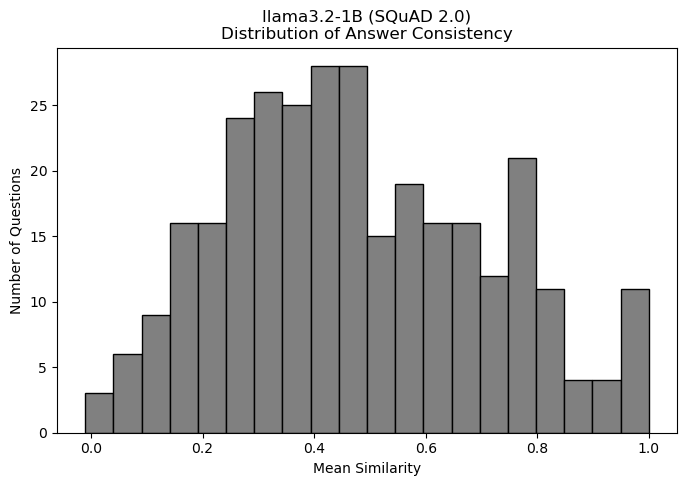

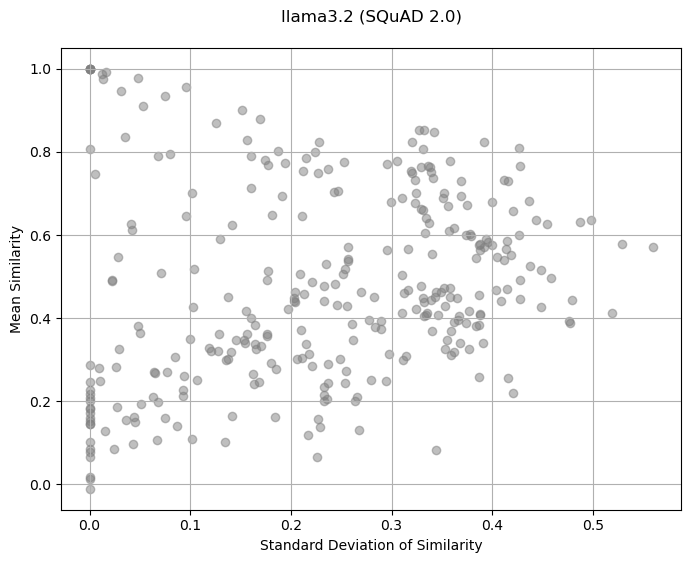

In [ ]:
# Plot distribution of mean similarity
plt.figure(figsize=(8, 5))
plt.hist(agg_df_squad['mean'], bins=20, color='grey', edgecolor='black')
plt.xlabel("Mean Similarity")
plt.ylabel("Number of Questions")
plt.title("llama3.2-1B (SQuAD 2.0)\nDistribution of Answer Correctness")
#plt.savefig("figures/metrics/sampling_consistency/consistency_distribution_squad_llama3.2.png")
plt.show()

# 
plt.figure(figsize=(8,6))
plt.scatter(agg_df_squad['std'], agg_df_squad['mean'], alpha=0.5, color='grey')
plt.xlabel("Standard Deviation of Similarity")
plt.ylabel("Mean Similarity")
plt.title("llama3.2 (SQuAD 2.0)\n")
plt.grid(True)
plt.show()

- The higher uncertainty (higher values of sdt), the lower the similarity to ground truth -> negative correlation between uncertainty and quality
- If model is not so certain (more variation), it is more likely wrong
- Std~0 implies no variation at all, but the quality (mean similarity) is not necessarily high\
    -> high consistency doesn't necessarily mean that the answer is correct
- Std>0.3 implies high uncertainty but low similarites at the same time (might be unanswerable questions -> CHECK)

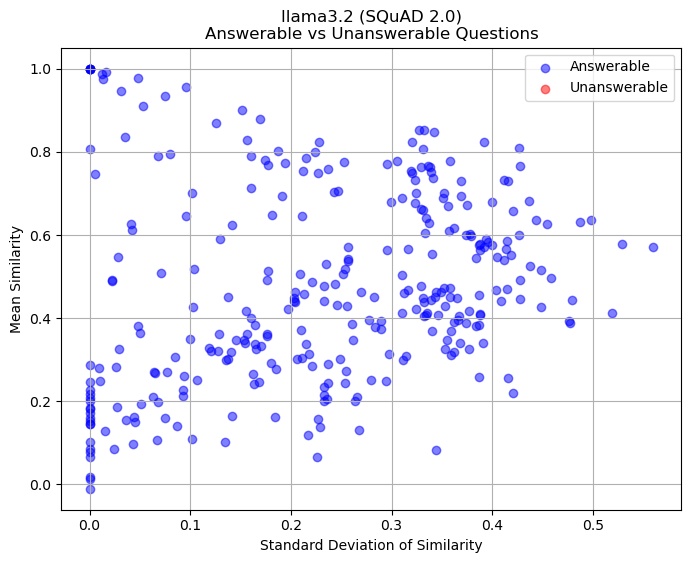

In [82]:
# Scatterplot of std vs mean similarity for unanswerable and answerable questions
df_ans = agg_df_squad[agg_df_squad['is_impossible'] == False]
df_unans = agg_df_squad[agg_df_squad['is_impossible'] == True]

plt.figure(figsize=(8,6))
plt.scatter(df_ans['std'], df_ans['mean'], alpha=0.5, label='Answerable', color='blue')
plt.scatter(df_unans['std'], df_unans['mean'], alpha=0.5, label='Unanswerable', color='red')
plt.xlabel("Standard Deviation of Similarity")
plt.ylabel("Mean Similarity")
plt.title("llama3.2 (SQuAD 2.0)\nAnswerable vs Unanswerable Questions")
plt.legend()
plt.grid(True)
plt.show()


### RoBERTa

- Natural NLI setup:
    - Premise: ground truth (or question + ground truth)
    - Hypothesis: model's generated answers
- Output: P(entailment) = How strongly does this answer logically follow from the ground truth?

In [ ]:
agg_df_squad_roberta = compute_roberta_mnli_similarity(
    df=df_squad_merged,
    question_id_col="question_id",
    answer_col="parsed_answer",
    is_impossible_col="is_impossible",
    mode="answer_ground_truth",
    ground_truth_col="gt_answer",
    question_text_col="question"
)
agg_df_squad_roberta.head(15)

,is_impossible,question_id,num_answers,n_pairs,mean_similarity,std_similarity,mean_entropy,std_entropy,uncertainty
0,False,0,5,5,0.009335,0.000000,0.664935,0.000000,0.990665
1,False,1,5,5,0.540414,0.104364,0.767661,0.132754,0.459586
2,False,2,5,5,0.301646,0.169058,0.792160,0.059519,0.698354
3,False,3,5,5,0.103275,0.167137,0.564284,0.179319,0.896725
4,False,4,5,5,0.199921,0.289006,0.712015,0.037164,0.800079
5,False,5,5,5,0.089133,0.160704,0.574433,0.163439,0.910867
6,False,6,5,5,0.393947,0.308512,0.652506,0.056888,0.606053
7,False,7,5,5,0.114168,0.172174,0.587928,0.046950,0.885832
8,False,8,5,5,0.069622,0.128443,0.417476,0.125797,0.930378
9,False,9,5,5,0.011707,0.005738,0.434882,0.012663,0.988293


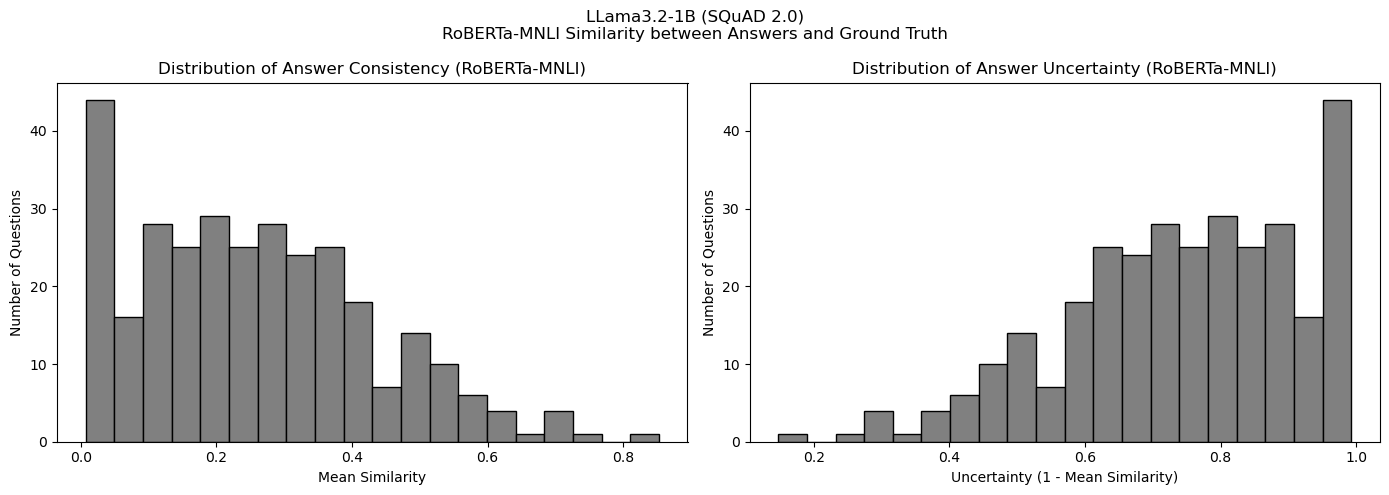

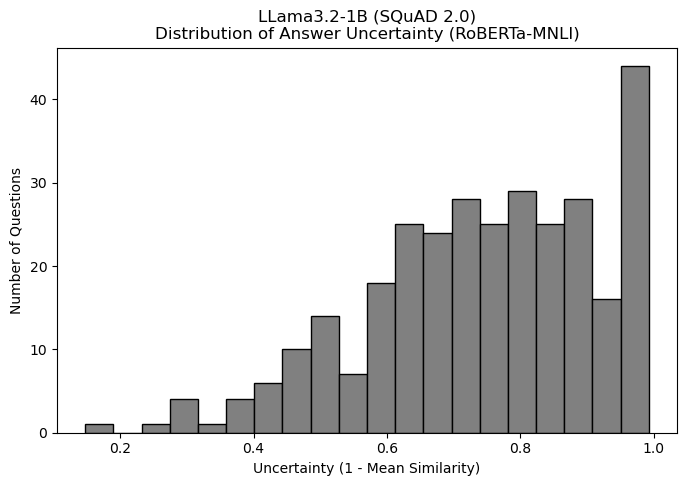

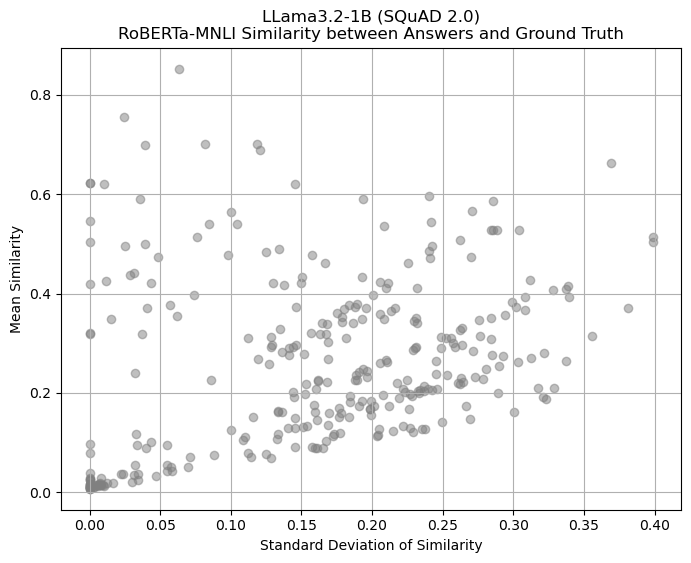

In [236]:
# Distribution of mean similarity and uncertainty
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(agg_df_squad_roberta['mean_similarity'], bins=20, color='grey', edgecolor='black')
axes[0].set_xlabel("Mean Similarity")
axes[0].set_ylabel("Number of Questions")
axes[0].set_title("Distribution of Answer Consistency (RoBERTa-MNLI)")
axes[1].hist(agg_df_squad_roberta['uncertainty'], bins=20, color='grey', edgecolor='black')
axes[1].set_xlabel("Uncertainty (1 - Mean Similarity)")
axes[1].set_ylabel("Number of Questions")
axes[1].set_title("Distribution of Answer Uncertainty (RoBERTa-MNLI)") 

fig.suptitle("LLama3.2-1B (SQuAD 2.0)\nRoBERTa-MNLI Similarity between Answers and Ground Truth")
plt.tight_layout()
#plt.savefig("figures/metrics/sampling_consistency/consistency_uncertainty_distribution_squad_llama3.2_roberta.png")
plt.show() 

# Distribution of uncertainty
plt.figure(figsize=(8, 5))
plt.hist(agg_df_squad_roberta['uncertainty'], bins=20, color='grey', edgecolor='black')
plt.xlabel("Uncertainty (1 - Mean Similarity)")
plt.ylabel("Number of Questions")
plt.title("LLama3.2-1B (SQuAD 2.0)\nDistribution of Answer Uncertainty (RoBERTa-MNLI)")
#plt.savefig("figures/metrics/sampling_consistency/consistency_uncertainty_distribution_squad_llama3.2_roberta.png")
plt.show()

# Distribution of mean similarity and std similarity
plt.figure(figsize=(8, 6))
plt.scatter(agg_df_squad_roberta['std_similarity'], agg_df_squad_roberta['mean_similarity'], alpha=0.5, color='grey')
plt.xlabel("Standard Deviation of Similarity")
plt.ylabel("Mean Similarity")
plt.title("LLama3.2-1B (SQuAD 2.0)\nRoBERTa-MNLI Similarity between Answers and Ground Truth")
plt.grid(True)
#plt.savefig("figures/metrics/sampling_consistency/consistency_std_mean_squad_llama3.2_roberta.png")
plt.show()

# Analysis of TriviaQA Dataset
## Consistency between model answers
### SentenceBERT

In [85]:
# Compute SentenceBERT similarity for TriviaQA dataset
similarity_df_trivia = compute_sentenceBERT_similarity(
    df=df_parsed_trivia,
    question_id_col="question_id",
    answer_col="parsed_answer"
)
similarity_df_trivia["dataset"] = "TriviaQA"

print(similarity_df_trivia.shape)
print(similarity_df_trivia.head(15))

(499, 6)
    question_id  num_answers  mean_similarity  std_similarity  n_pairs  \
0             0            4         0.288603        0.163215        6   
1             1            5         0.281912        0.258958       10   
2             2            5         0.274300        0.180328       10   
3             3            5         0.322262        0.254639       10   
4             4            4         0.440509        0.252386        6   
5             5            5         0.273759        0.238799       10   
6             6            5         0.273370        0.126282       10   
7             7            4         0.644452        0.355548        6   
8             8            5         0.336051        0.177401       10   
9             9            5         0.210508        0.175956       10   
10           10            5         0.261877        0.216773       10   
11           11            4         0.357766        0.231450        6   
12           12            5 

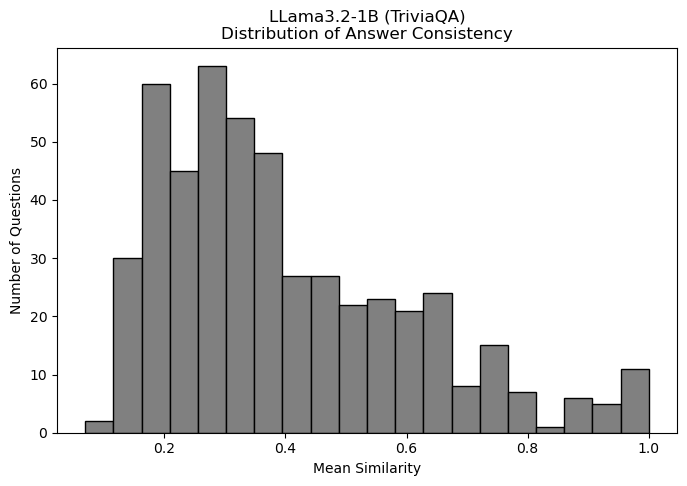

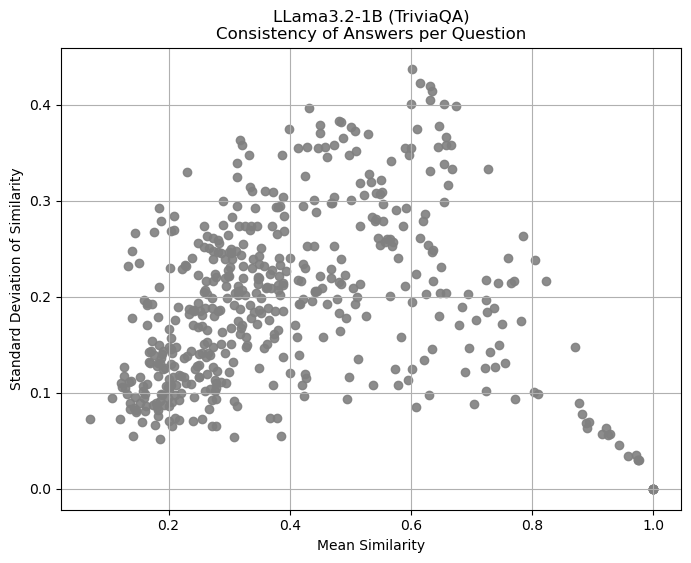

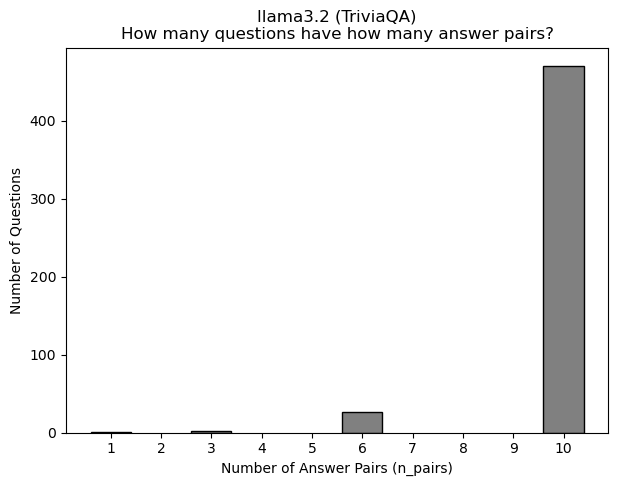

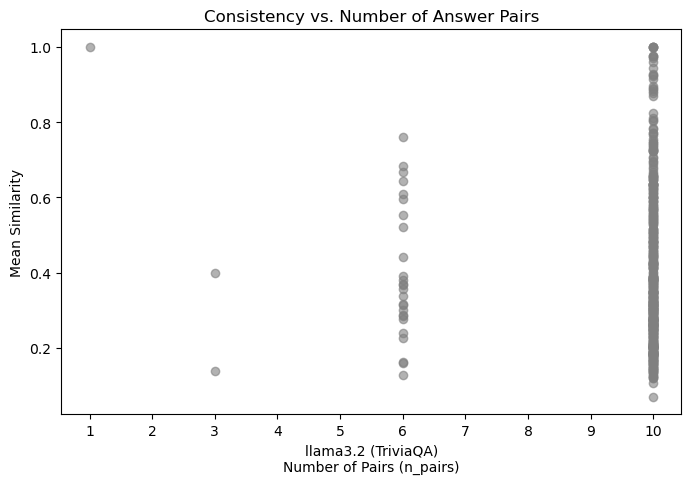

In [89]:
# Distribution of mean similarity for TriviaQA dataset
plt.figure(figsize=(8, 5))
plt.hist(similarity_df_trivia["mean_similarity"], bins=20, color="grey", edgecolor='black')
plt.xlabel("Mean Similarity")
plt.ylabel("Number of Questions")
plt.title("LLama3.2-1B (TriviaQA)\nDistribution of Answer Consistency")
#plt.savefig("figures/metrics/sampling_consistency/consistency_distribution_trivia_llama3.2.png")
plt.show()

# Consistency of answers per question for TriviaQA dataset
plt.figure(figsize=(8, 6))
plt.scatter(similarity_df_trivia["mean_similarity"], similarity_df_trivia["std_similarity"], alpha=0.9, color='grey')
plt.xlabel("Mean Similarity")
plt.ylabel("Standard Deviation of Similarity")
plt.title("LLama3.2-1B (TriviaQA)\nConsistency of Answers per Question")
plt.grid(True)
#plt.savefig("figures/metrics/sampling_consistency/consistency_std_mean_trivia_llama3.2.png")
plt.show()

# Count the number of answer pairs (n_pairs) for TriviaQA dataset
pair_counts = similarity_df_trivia["n_pairs"].value_counts().sort_index()
plt.figure(figsize=(7, 5))
plt.bar(pair_counts.index, pair_counts.values, width=0.8, edgecolor='black', color='grey')
plt.xlabel("Number of Answer Pairs (n_pairs)")
plt.ylabel("Number of Questions")
plt.title("llama3.2 (TriviaQA)\nHow many questions have how many answer pairs?")
plt.xticks(range(1, 11))
#plt.savefig("figures/metrics/sampling_consistency/distribution_npairs_trivia_llama3.2.png")
plt.show()

# Scatterplot of n_pairs vs mean similarity for TriviaQA dataset
plt.figure(figsize=(8, 5))
plt.scatter(similarity_df_trivia["n_pairs"], similarity_df_trivia["mean_similarity"], alpha=0.6, color='grey')
plt.xlabel("llama3.2 (TriviaQA)\nNumber of Pairs (n_pairs)")
plt.ylabel("Mean Similarity")
plt.title("Consistency vs. Number of Answer Pairs")
plt.xticks(range(1, 11))
#plt.savefig("figures/metrics/sampling_consistency/npairs_consistencymean_trivia_llama3.2.png")
plt.show()

<Figure size 700x500 with 0 Axes>

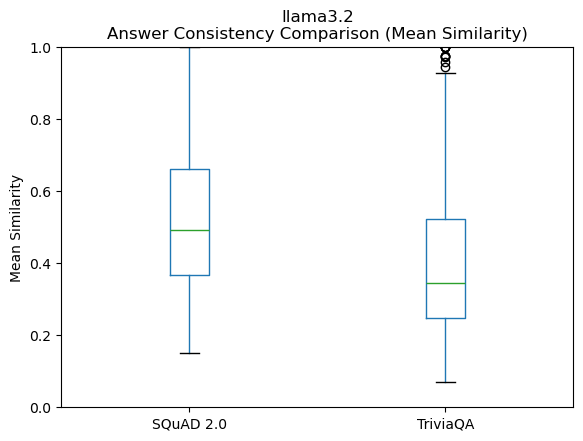

In [90]:
# Compare SQuAD and TriviaQA
similarity_df_squad["dataset"] = "SQuAD 2.0"
similarity_df_trivia["dataset"] = "TriviaQA"
combined = pd.concat([similarity_df_squad, similarity_df_trivia], ignore_index=True)

plt.figure(figsize=(7, 5))
combined.boxplot(by="dataset", column="mean_similarity", grid=False)
plt.title("llama3.2\nAnswer Consistency Comparison (Mean Similarity)")
plt.suptitle("")
plt.ylabel("Mean Similarity")
plt.xlabel("")
plt.ylim(0, 1)
plt.savefig("figures/metrics/sampling_consistency/consistency_comparison_squad_trivia_llama3.2.png")
plt.show()

### RoBERTa

In [248]:
similarity_df_trivia_roberta = compute_roberta_mnli_similarity(
    df=df_parsed_trivia,
    question_id_col="question_id",
    answer_col="parsed_answer",
    is_impossible_col=None,
    mode="answer_answer"
)
similarity_df_trivia_roberta["dataset"] = "TriviaQA"
similarity_df_trivia_roberta.head(15)

,question_id,num_answers,n_pairs,mean_similarity,std_similarity,mean_entropy,std_entropy,uncertainty,dataset
0,0,3,3,0.010924,0.003152,0.102672,0.030673,0.989076,TriviaQA
1,1,5,10,0.346627,0.378810,0.381069,0.218195,0.653373,TriviaQA
2,2,5,10,0.166875,0.179518,0.409874,0.268716,0.833125,TriviaQA
3,3,4,6,0.167012,0.351303,0.116298,0.051397,0.832988,TriviaQA
4,4,4,6,0.403309,0.355538,0.454020,0.223234,0.596691,TriviaQA
5,5,5,10,0.540500,0.271039,0.437882,0.180514,0.459500,TriviaQA
6,6,5,10,0.318801,0.322068,0.390269,0.237187,0.681199,TriviaQA
7,7,4,6,0.718507,0.248443,0.390563,0.234162,0.281493,TriviaQA
8,8,5,10,0.572608,0.458896,0.172851,0.062326,0.427392,TriviaQA
9,9,4,6,0.409497,0.259659,0.647908,0.293250,0.590503,TriviaQA


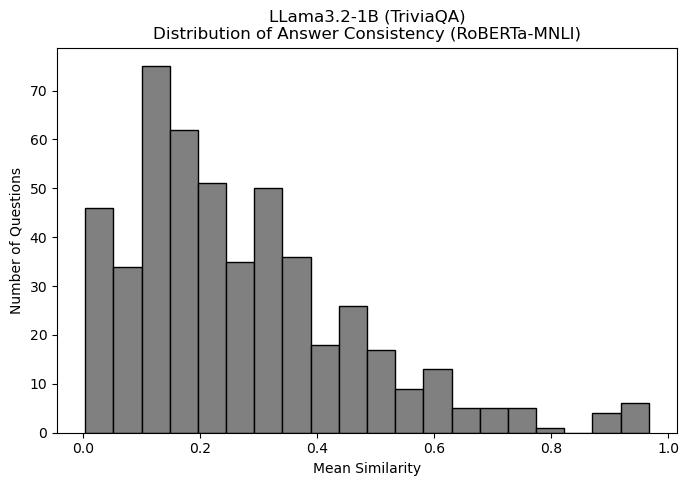

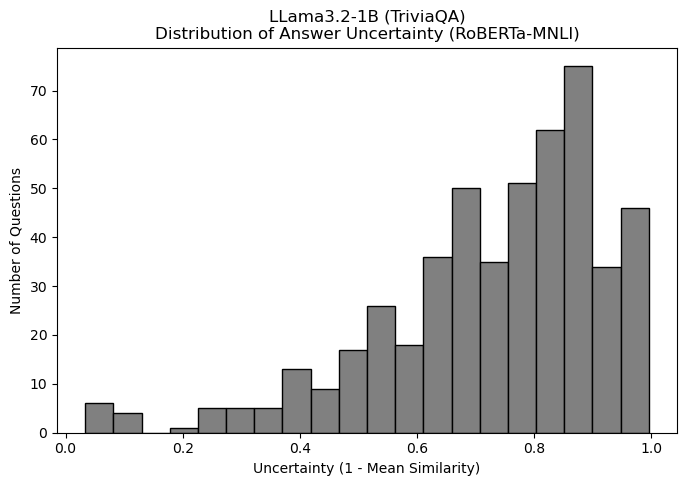

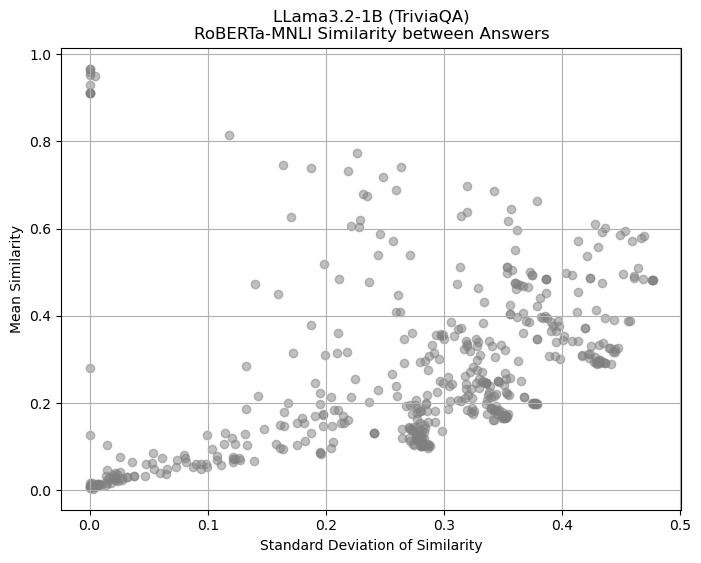

In [251]:
# Plot distribution of mean similarity
plt.figure(figsize=(8, 5)) 
plt.hist(similarity_df_trivia_roberta["mean_similarity"], bins=20, color="grey", edgecolor='black')
plt.xlabel("Mean Similarity")
plt.ylabel("Number of Questions")
plt.title("LLama3.2-1B (TriviaQA)\nDistribution of Answer Consistency (RoBERTa-MNLI)")
#plt.savefig("figures/metrics/sampling_consistency/consistency_distribution_trivia_llama3.2_roberta.png")
plt.show()

# Plot uncertainty distribution
plt.figure(figsize=(8, 5))
plt.hist(similarity_df_trivia_roberta["uncertainty"], bins=20, color="grey", edgecolor='black')
plt.xlabel("Uncertainty (1 - Mean Similarity)")
plt.ylabel("Number of Questions")
plt.title("LLama3.2-1B (TriviaQA)\nDistribution of Answer Uncertainty (RoBERTa-MNLI)")
#plt.savefig("figures/metrics/sampling_consistency/consistency_uncertainty_distribution_trivia_llama3.2_roberta.png")
plt.show()

# Scatterplot of std vs mean similarity
plt.figure(figsize=(8, 6))
plt.scatter(similarity_df_trivia_roberta['std_similarity'], similarity_df_trivia_roberta['mean_similarity'], alpha=0.5, color='grey')
plt.xlabel("Standard Deviation of Similarity")
plt.ylabel("Mean Similarity")
plt.title("LLama3.2-1B (TriviaQA)\nRoBERTa-MNLI Similarity between Answers")
plt.grid(True)
#plt.savefig("figures/metrics/sampling_consistency/consistency_std_mean_trivia_llama3.2_roberta.png")
plt.show()  


## Generate Correctness of model answers
### SentenceBERT

In [91]:
df_trivia_original = pd.read_csv("data/triviaqa-unfiltered/trivia_all.csv")
df_trivia_merged = df_parsed_trivia.merge(df_trivia_original[['question', 'answers']], on='question', how='left', suffixes=('', '_gt'))
df_trivia_merged.head(15)

,question,question_id,question_source,answers,prompt,sample_id,model_output,parsed_answer,parsed_confidence,answers_gt
0,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,0,(5 points)\n\nWhat is the result of dividing a...,is c the quotient,NaN,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re..."
1,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,1,"(A) Fraction, (B) Integer, (C) Decimal, (D) De...",is d},NaN,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re..."
2,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,2,(1) One\n(2) Zero\n(3) One-half\n(4) Square ro...,is $\boxed{4}$,NaN,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re..."
3,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,3,&quot;\n\nA) Quotient\nB) Remainder\nC) Produc...,is $\boxed{a}$,NaN,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re..."
4,The result of dividing a number into one is ca...,0,http://www.odquiz.org.uk/,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re...",You are a fact-checking assistant. Answer the ...,4,NaN,None,NaN,"['RECIPROCAL', 'reciprocal', 'Reciprocal', 'Re..."
5,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,0,A) The Lamb & Flag\nB) The Eagle and Child\nC)...,a the lamb & flag,NaN,"['The Blind Beggar', 'blind beggar', 'Blind Be..."
6,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,1,A) The Eagle and Child\nB) The Spaniards Inn\n...,b the spaniards inn,NaN,"['The Blind Beggar', 'blind beggar', 'Blind Be..."
7,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,2,A) The Eagle\nB) The Lamb & Flag\nC) The Crane...,a the eagle,NaN,"['The Blind Beggar', 'blind beggar', 'Blind Be..."
8,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,3,"In 1962, Ronnie Kray was sentenced to 30 years...",a the lamb & flag,NaN,"['The Blind Beggar', 'blind beggar', 'Blind Be..."
9,In which London pub did Ronnie Kray murder Geo...,1,http://www.businessballs.com/,"['The Blind Beggar', 'blind beggar', 'Blind Be...",You are a fact-checking assistant. Answer the ...,4,A) The Sherlock Holmes pub \nB) The Sherlock H...,is e,NaN,"['The Blind Beggar', 'blind beggar', 'Blind Be..."


In [92]:
# Extract Ground Truth
def extract_gt(answer_str):
    try:
        return eval(answer_str)[0]
    except:
        return None

df_trivia_merged['gt_answer'] = df_trivia_merged['answers'].apply(extract_gt)
df_trivia_merged = df_trivia_merged.dropna(subset=['parsed_answer', 'gt_answer'])

# Compute SBERT similarity to ground truth
def compute_similarity(row):
    emb1 = model.encode(row['parsed_answer'], convert_to_tensor=True)
    emb2 = model.encode(row['gt_answer'], convert_to_tensor=True)
    return float(util.cos_sim(emb1, emb2).item())

df_trivia_merged['sbert_to_gt'] = df_trivia_merged.apply(compute_similarity, axis=1)

# Aggregation pro Frage
agg_df_trivia = df_trivia_merged.groupby('question_id')['sbert_to_gt'].agg(['mean', 'std', 'min', 'max']).reset_index()

In [93]:
agg_df_trivia.head(15)

,question_id,mean,std,min,max
0,0,0.173989,0.113735,0.058468,0.325838
1,1,0.186323,0.066193,0.074141,0.250226
2,2,0.190998,0.094613,0.106202,0.298147
3,3,0.388431,0.181409,0.144536,0.634027
4,4,0.224235,0.086239,0.147279,0.298903
5,5,0.397257,0.348015,0.118677,1.000000
6,6,0.382174,0.232342,0.174801,0.646148
7,7,0.541725,0.217038,0.216168,0.650244
8,8,0.170895,0.065432,0.077648,0.245814
9,9,0.281013,0.154804,0.095518,0.475234


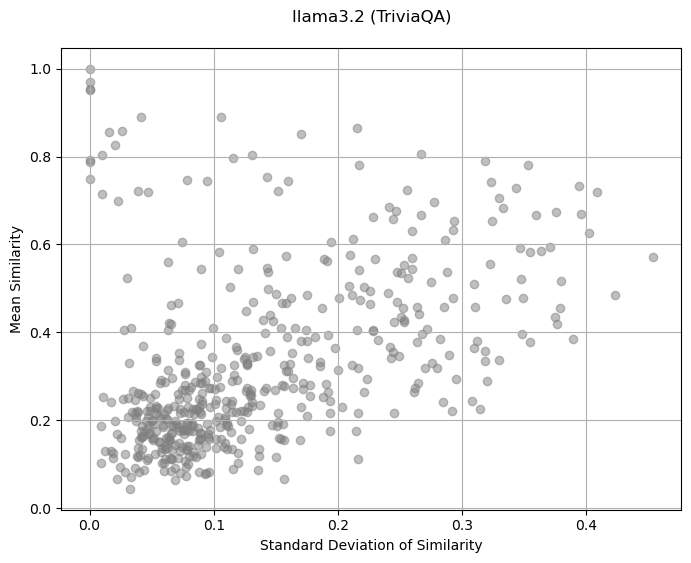

In [94]:
plt.figure(figsize=(8,6))
plt.scatter(agg_df_trivia['std'], agg_df_trivia['mean'], alpha=0.5, color='grey')
plt.xlabel("Standard Deviation of Similarity")
plt.ylabel("Mean Similarity")
plt.title("llama3.2 (TriviaQA)\n")
plt.grid(True)
plt.show()

- Model gives repeated wrong answers, which differ not much -> is consistently wrong
- not strong relationship between uncertainty and consistency -> uncertainty is not a good measurement for quality

### RoBERTa

In [252]:
df_agg_trivia_roberta = compute_roberta_mnli_similarity(
    df=df_trivia_merged,
    question_id_col="question_id",
    answer_col="parsed_answer",
    is_impossible_col=None,
    mode="answer_ground_truth",
    ground_truth_col="gt_answer",
    question_text_col="question"
)
df_agg_trivia_roberta.head(15)

,question_id,num_answers,n_pairs,mean_similarity,std_similarity,mean_entropy,std_entropy,uncertainty
0,0,4,4,0.052742,0.014666,0.627364,0.078730,0.947258
1,1,5,5,0.010598,0.007198,0.294545,0.090559,0.989402
2,2,5,5,0.014230,0.009636,0.384476,0.106999,0.985770
3,3,4,4,0.091422,0.066047,0.647403,0.203914,0.908578
4,4,4,4,0.012266,0.003311,0.426145,0.031545,0.987734
5,5,5,5,0.084192,0.131479,0.502978,0.232411,0.915808
6,6,5,5,0.047993,0.035322,0.650721,0.161512,0.952007
7,7,4,4,0.310371,0.163314,0.812701,0.034036,0.689629
8,8,5,5,0.059004,0.039116,0.673549,0.151169,0.940996
9,9,5,5,0.079538,0.056536,0.607904,0.213395,0.920462


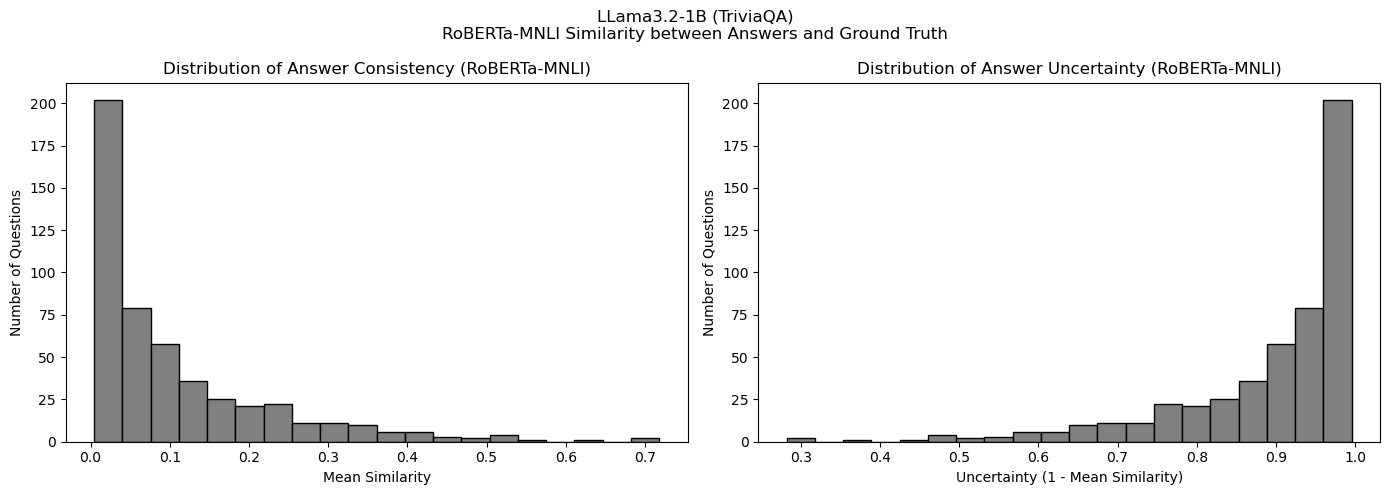

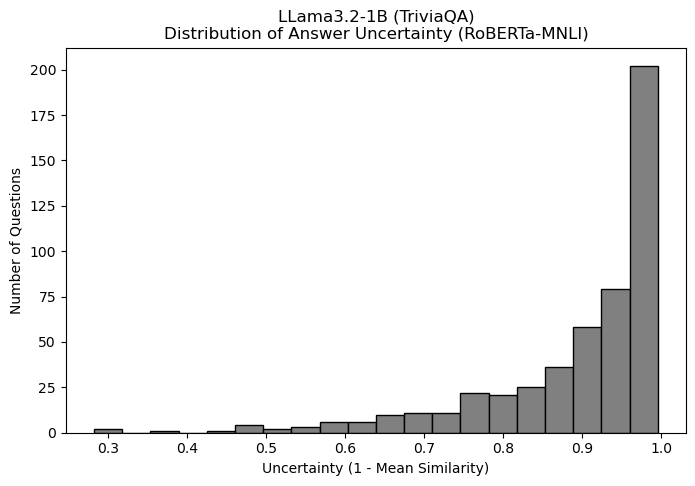

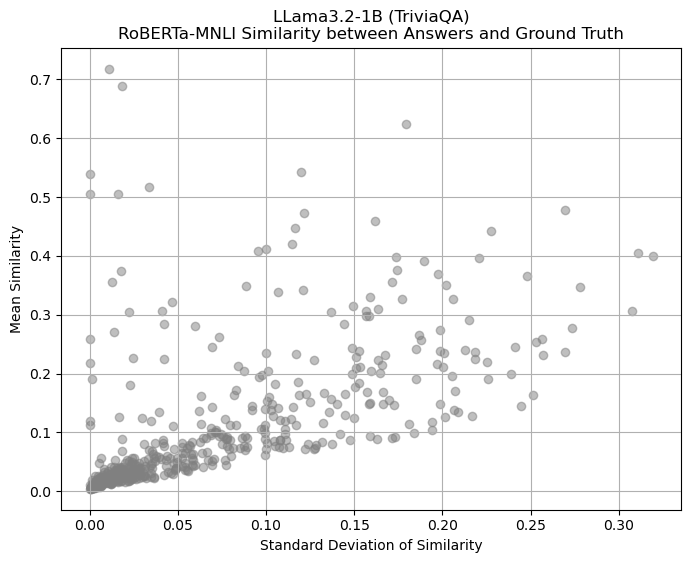

In [255]:
# Plot mean similarity and uncertainty distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df_agg_trivia_roberta['mean_similarity'], bins=20, color='grey', edgecolor='black')
axes[0].set_xlabel("Mean Similarity")
axes[0].set_ylabel("Number of Questions")
axes[0].set_title("Distribution of Answer Consistency (RoBERTa-MNLI)")
axes[1].hist(df_agg_trivia_roberta['uncertainty'], bins=20, color='grey', edgecolor='black')
axes[1].set_xlabel("Uncertainty (1 - Mean Similarity)")
axes[1].set_ylabel("Number of Questions")
axes[1].set_title("Distribution of Answer Uncertainty (RoBERTa-MNLI)")
fig.suptitle("LLama3.2-1B (TriviaQA)\nRoBERTa-MNLI Similarity between Answers and Ground Truth")
plt.tight_layout()
#plt.savefig("figures/metrics/sampling_consistency/consistency_uncertainty_distribution_trivia_llama3.2_roberta.png")
plt.show()

# Plot uncertainty distribution
plt.figure(figsize=(8, 5))
plt.hist(df_agg_trivia_roberta['uncertainty'], bins=20, color='grey', edgecolor='black')
plt.xlabel("Uncertainty (1 - Mean Similarity)")
plt.ylabel("Number of Questions")
plt.title("LLama3.2-1B (TriviaQA)\nDistribution of Answer Uncertainty (RoBERTa-MNLI)")
#plt.savefig("figures/metrics/sampling_consistency/consistency_uncertainty_distribution_trivia_llama3.2_roberta.png")
plt.show()

# Plot std vs mean similarity
plt.figure(figsize=(8, 6))
plt.scatter(df_agg_trivia_roberta['std_similarity'], df_agg_trivia_roberta['mean_similarity'], alpha=0.5, color='grey')
plt.xlabel("Standard Deviation of Similarity")
plt.ylabel("Mean Similarity")
plt.title("LLama3.2-1B (TriviaQA)\nRoBERTa-MNLI Similarity between Answers and Ground Truth")
plt.grid(True)
#plt.savefig("figures/metrics/sampling_consistency/consistency_std_mean_trivia_llama3.2_roberta.png")
plt.show()

# Comparison between datasets
## SentenceBERT

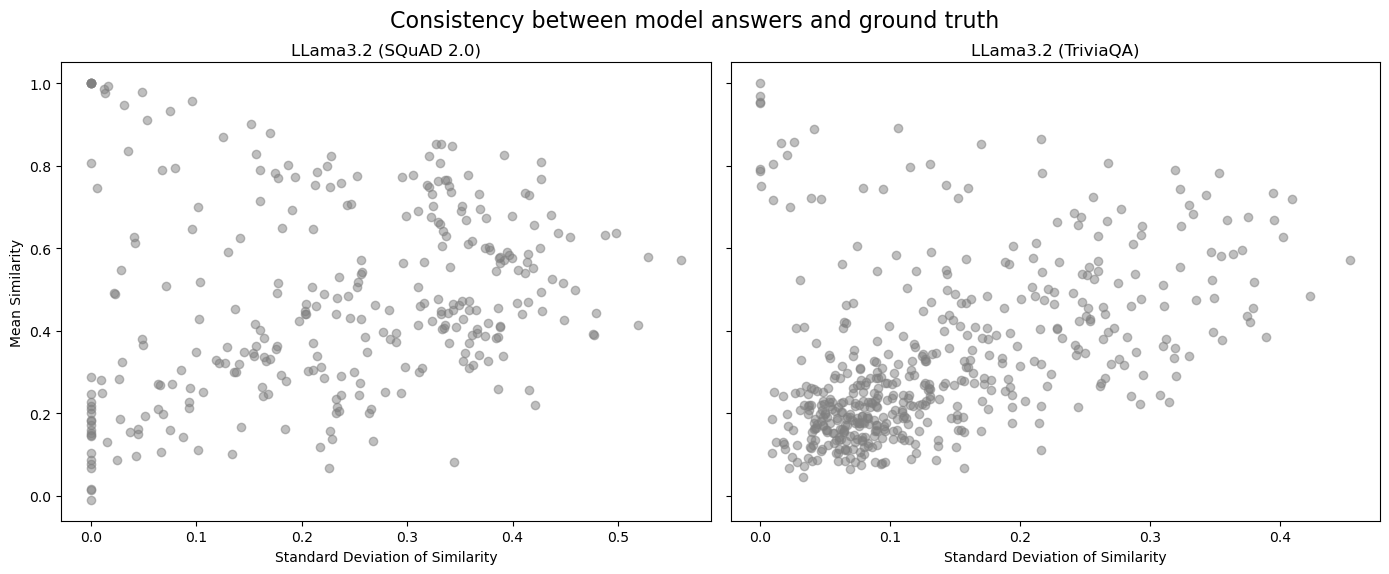

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].scatter(agg_df_squad['std'], agg_df_squad['mean'], alpha=0.5, color='gray')
axes[0].set_title("LLama3.2-1B (SQuAD 2.0)")
axes[0].set_xlabel("Standard Deviation of Similarity")
axes[0].set_ylabel("Mean Similarity")

axes[1].scatter(agg_df_trivia['std'], agg_df_trivia['mean'], alpha=0.5, color='gray')
axes[1].set_title("LLama3.2-1B (TriviaQA)")
axes[1].set_xlabel("Standard Deviation of Similarity")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Consistency between model answers and ground truth", fontsize=16)
plt.show()

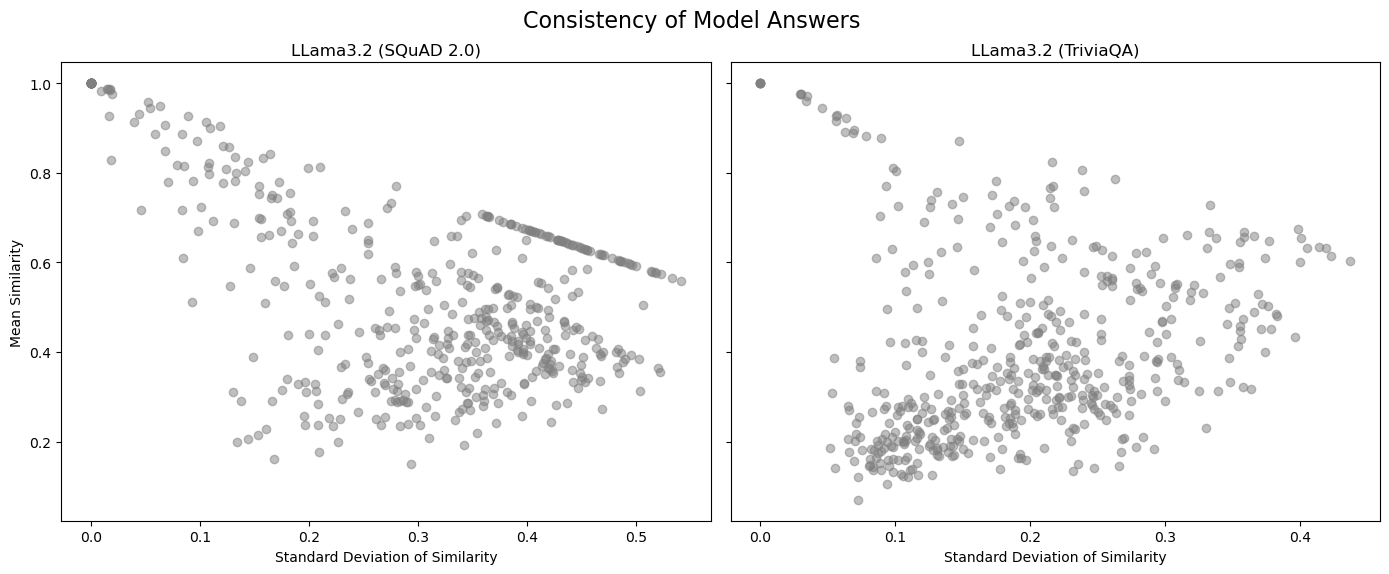

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].scatter(similarity_df_squad['std_similarity'], similarity_df_squad['mean_similarity'], alpha=0.5, color='grey')
axes[0].set_title("LLama3.2-1B (SQuAD 2.0)")
axes[0].set_xlabel("Standard Deviation of Similarity")
axes[0].set_ylabel("Mean Similarity")

axes[1].scatter(similarity_df_trivia['std_similarity'], similarity_df_trivia['mean_similarity'], alpha=0.5, color='grey')
axes[1].set_title("LLama3.2-1B (TriviaQA)")
axes[1].set_xlabel("Standard Deviation of Similarity")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Consistency of Model Answers ", fontsize=16)
plt.show()

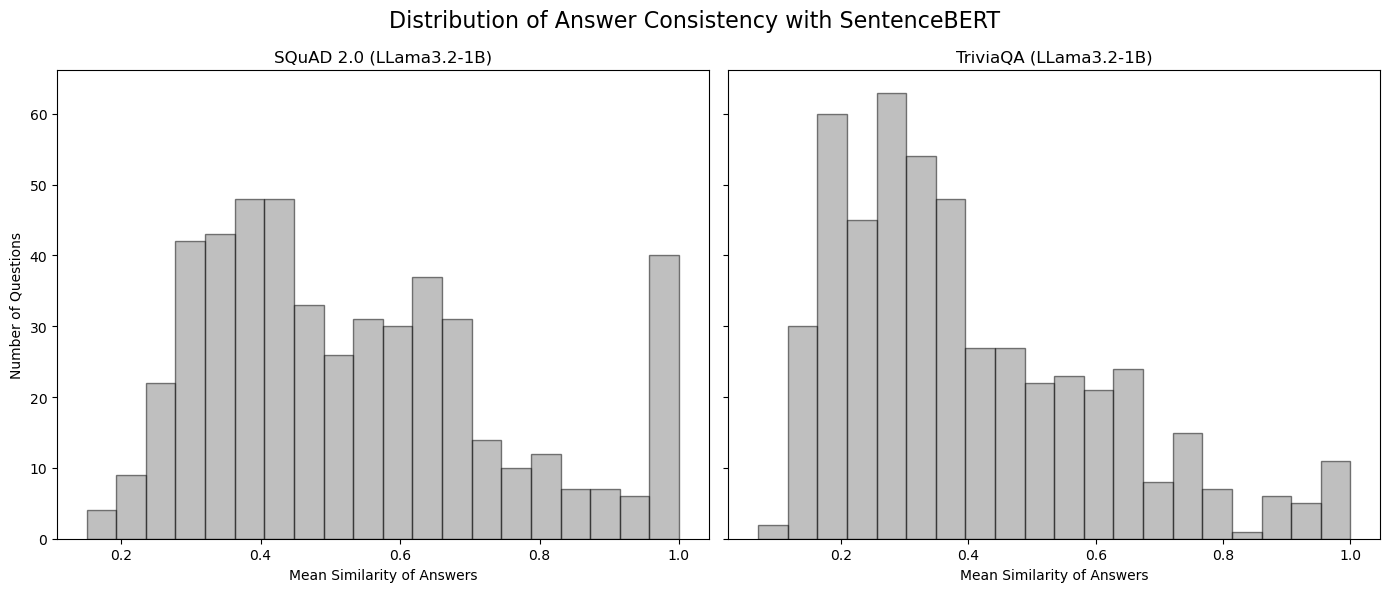

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
# SQuAD 2.0
axes[0].hist(similarity_df_squad["mean_similarity"], bins=20, color="grey",
             edgecolor='black', alpha=0.5, label='SQuAD 2.0')
axes[0].set_xlabel("Mean Similarity of Answers")
axes[0].set_ylabel("Number of Questions")
axes[0].set_title("SQuAD 2.0 (LLama3.2-1B)")

# TriviaQA
axes[1].hist(similarity_df_trivia["mean_similarity"], bins=20, color="grey",
             edgecolor='black', alpha=0.5, label='TriviaQA')
axes[1].set_xlabel("Mean Similarity of Answers")
axes[1].set_title("TriviaQA (LLama3.2-1B)")

fig.suptitle("Distribution of Answer Consistency with SentenceBERT", fontsize=16)
plt.tight_layout()  # Platz für die Überschrift lassen
plt.show()




## RoBERTa

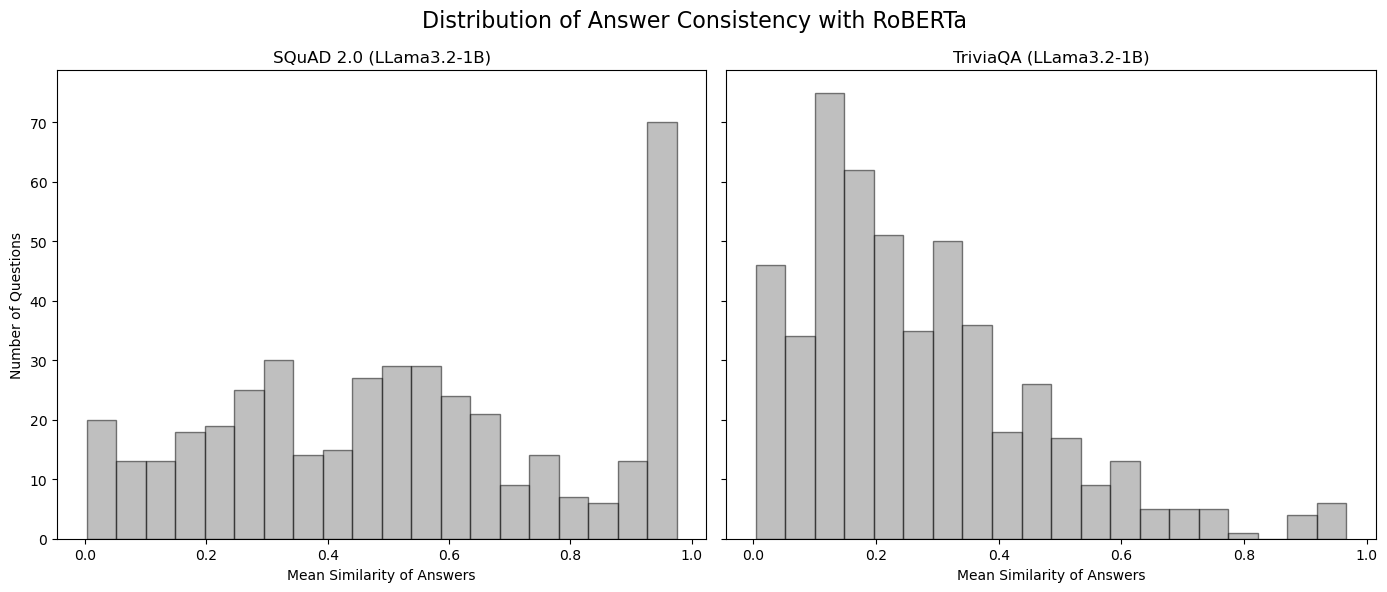

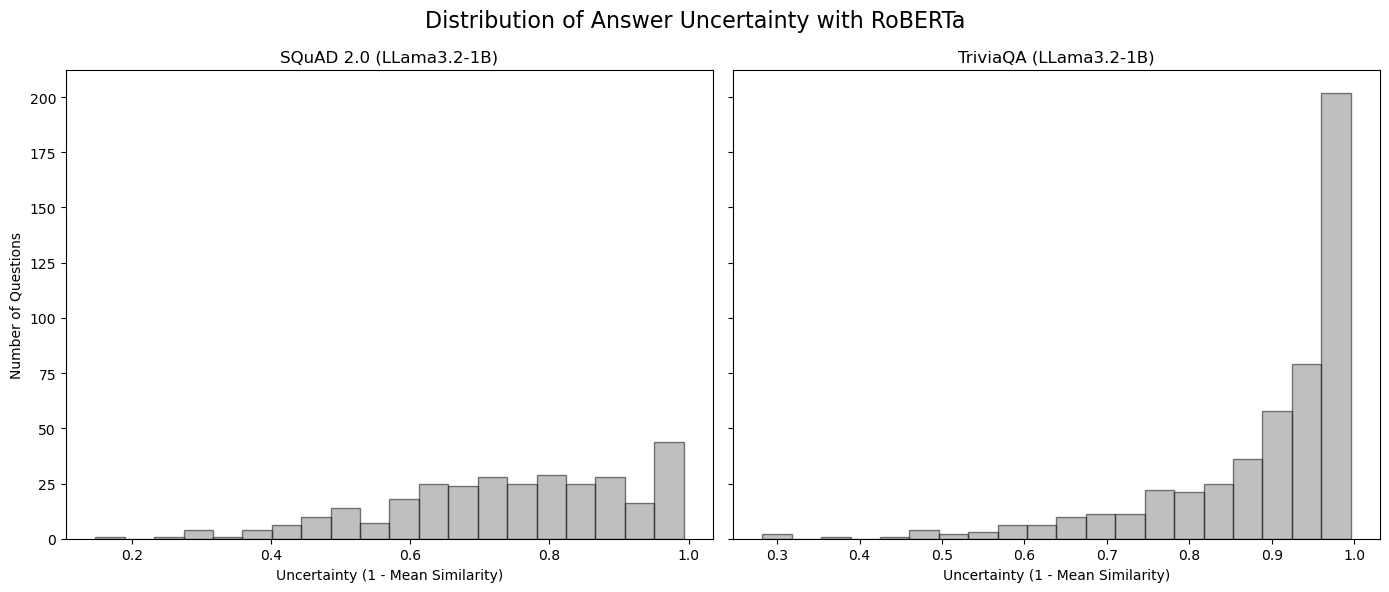

In [ ]:
# Compare mean similairity between SQuAD and TriviaQA
similarity_df_squad_roberta["dataset"] = "SQuAD 2.0"
similarity_df_trivia_roberta["dataset"] = "TriviaQA"

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
# SQuAD 2.0
axes[0].hist(similarity_df_squad_roberta["mean_similarity"], bins=20, color="grey",
             edgecolor='black', alpha=0.5, label='SQuAD 2.0')
axes[0].set_xlabel("Mean Similarity of Answers")
axes[0].set_ylabel("Number of Questions")
axes[0].set_title("SQuAD 2.0 (LLama3.2-1B)")

# TriviaQA
axes[1].hist(similarity_df_trivia_roberta["mean_similarity"], bins=20, color="grey",
             edgecolor='black', alpha=0.5, label='TriviaQA')
axes[1].set_xlabel("Mean Similarity of Answers")
axes[1].set_title("TriviaQA (LLama3.2-1B)")

fig.suptitle("Distribution of Answer Consistency with RoBERTa", fontsize=16)
plt.tight_layout()
plt.show()

# Compare uncertainty between SQuAD and TriviaQA
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
# SQuAD 2.0
axes[0].hist(agg_df_squad_roberta["uncertainty"], bins=20, color="grey", edgecolor='black', alpha=0.5, label='SQuAD 2.0')
axes[0].set_xlabel("Uncertainty (1 - Mean Similarity)")
axes[0].set_ylabel("Number of Questions")
axes[0].set_title("SQuAD 2.0 (LLama3.2-1B)")
# TriviaQA
axes[1].hist(df_agg_trivia_roberta["uncertainty"], bins=20, color="grey", edgecolor='black', alpha=0.5, label='TriviaQA')
axes[1].set_xlabel("Uncertainty (1 - Mean Similarity)")
axes[1].set_title("TriviaQA (LLama3.2-1B)")
fig.suptitle("Distribution of Answer Uncertainty with RoBERTa", fontsize=16)
plt.tight_layout()
plt.show()

# Compute evaluation metrics (ECE, AUROC)
- Measure confidence via average similarity between model answers and ground truth\
OR via low variation -> confidence = 1-std
- accuracy = average similarity between model answers and ground truth needs to be bigger than 0.8

## Helper functions to compute evaluation metrics

In [ ]:
'''
def compute_ece(confidences, accuracies, n_bins=10):
    bin_bounds = np.linspace(0, 1, n_bins + 1)
    ece = 0.0

    for i in range(n_bins):
        # Bin bounds
        bin_lower = bin_bounds[i]
        bin_upper = bin_bounds[i + 1]

        # Filter confidences and accuracies within the bin
        mask = (confidences > bin_lower) & (confidences <= bin_upper)
        bin_confs = confidences[mask]
        bin_accs = accuracies[mask]

        if len(bin_confs) > 0:
            avg_conf = bin_confs.mean()
            avg_acc = bin_accs.mean()
            ece += (len(bin_confs) / len(confidences)) * abs(avg_conf - avg_acc)

    return ece
'''

def calculate_ece(df, confidence_col='parsed_confidence', correct_col='is_correct', n_bins=10):
    """
    Calculate the Expected Calibration Error (ECE) for a dataset.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing confidence scores and correctness information
    confidence_col : str, default='parsed_confidence'
        Name of the column containing confidence scores (0-100)
    correct_col : str, default='is_correct'
        Name of the column containing boolean correctness values
    n_bins : int, default=10
        Number of bins to use for binning confidence scores
        
    Returns:
    --------
    float
        The Expected Calibration Error value
    """
    
    # Filter out rows with missing values
    df_valid = df.dropna(subset=[confidence_col, correct_col])
    
    if len(df_valid) == 0:
        return np.nan
    
    # Create bins for confidence scores
    bin_edges = np.linspace(0, 100, n_bins + 1)
    bin_indices = np.digitize(df_valid[confidence_col], bin_edges) - 1
    bin_indices = np.clip(bin_indices, 0, n_bins - 1)  # Ensure indices are within range
    
    # Calculate ECE
    ece = 0
    total_samples = len(df_valid)
    
    for bin_idx in range(n_bins):
        # Get samples in this bin
        bin_mask = (bin_indices == bin_idx)
        bin_size = bin_mask.sum()
        
        if bin_size > 0:
            # Calculate average confidence and accuracy for this bin
            bin_conf = df_valid.loc[bin_mask, confidence_col].mean() / 100.0  # Normalize to [0,1]
            bin_acc = df_valid.loc[bin_mask, correct_col].mean()
            
            # Add weighted absolute difference to ECE
            ece += (bin_size / total_samples) * abs(bin_acc - bin_conf)
    
    return ece



In [ ]:
from sklearn.metrics import roc_curve, auc

def calculate_auroc(df, confidence_col='parsed_confidence', correct_col='is_correct'):
    """
    Calculate the Area Under the ROC Curve (AUROC) for a dataset.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing confidence scores and correctness information
    confidence_col : str, default='parsed_confidence'
        Name of the column containing confidence scores (0-100)
    correct_col : str, default='is_correct'
        Name of the column containing boolean correctness values
        
    Returns:
    --------
    float
        The AUROC value
    """
    
    # Filter out rows with missing values
    df_valid = df.dropna(subset=[confidence_col, correct_col])
    
    if len(df_valid) == 0:
        return np.nan
    
    # Ensure correct_col is boolean or 0/1
    if df_valid[correct_col].dtype == bool:
        y_true = df_valid[correct_col].astype(int)
    else:
        # Handle string True/False values if present
        if isinstance(df_valid[correct_col].iloc[0], str):
            y_true = df_valid[correct_col].map({'True': 1, 'False': 0}).astype(int)
        else:
            y_true = df_valid[correct_col].astype(int)
    
    # Normalize confidence to 0-1 range
    y_score = df_valid[confidence_col] / 100.0
    
    # Calculate ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    return roc_auc

## SQuAD

In [261]:
# Compute Accuracy for SQuAD dataset
agg_df_squad["is_correct"] = (agg_df_squad["mean"] > 0.8).astype(int)
accuracy_squad = agg_df_squad["is_correct"].mean()
print(f"Accuracy for SQuAD dataset: {accuracy_squad:.4f}")

# Compute ECE for SQuAD dataset
ece_squad = compute_ece(
    agg_df_squad["mean"],
    (agg_df_squad["mean"] > 0.8).astype(int)
)
print(f"ECE for SQuAD dataset: {ece_squad:.4f}")

# Compute AUROC for SQuAD dataset
auroc_squad = roc_auc_score(
    (agg_df_squad["mean"] > 0.8).astype(int),
    agg_df_squad["mean"]
)
print(f"AUROC for SQuAD dataset: {auroc_squad:.4f}")

Accuracy for SQuAD dataset: 0.0935
ECE for SQuAD dataset: 0.3996
AUROC for SQuAD dataset: 1.0000


## TriviaQA

In [262]:
# Compute Accuracy for TriviaQA dataset
agg_df_trivia["is_correct"] = (agg_df_trivia["mean"] > 0.8).astype(int)
accuracy_trivia = agg_df_trivia["is_correct"].mean()
print(f"Accuracy for TriviaQA dataset: {accuracy_trivia:.4f}")

# Compute ECE for TriviaQA dataset
ece_trivia = compute_ece(
    agg_df_trivia["mean"],
    (agg_df_trivia["mean"] > 0.8).astype(int)
)
print(f"ECE for TriviaQA dataset: {ece_trivia:.4f}")

# Compute AUROC for TriviaQA dataset
auroc_trivia = roc_auc_score(
    (agg_df_trivia["mean"] > 0.8).astype(int),
    agg_df_trivia["mean"]
)
print(f"AUROC for TriviaQA dataset: {auroc_trivia:.4f}")

Accuracy for TriviaQA dataset: 0.0280
ECE for TriviaQA dataset: 0.3014
AUROC for TriviaQA dataset: 1.0000
